<font size="+2" color=purple ><b> <center>Oil Production Time Series Analysis and Forecast Using Arima, Prophet and LSTM's</center></b></font>

___
- **Author:** Badr Eddine Berrehal (*Petroleum Engineer & Data Detective*)
- **Email:** [berrehalbadr@gmail.com](berrehalbadr@gmail.com)
- **LinkedIn:** [Badr Berrehal](https://www.linkedin.com/in/badreddine-berrehal-a51010175)
- **Personal Web site:** [UDATA](https://sites.google.com/view/badreddine-berrehal/accueil)
- **GitHub:** [berrehalbadr](https://github.com/berrehalbadr)
- **License Type:** MIT license

# Notebook Description
Various empirical methodologies are employed to estimate well production, and while these tend to perform moderately well in conventional regions, their error rates increase significantly in unconventional ones. 

Fortunately, recent and more advanced machine and deep learning models are more accustomed to the relatively noisy nature of this particular data and can even be configured to account for momentary shutdowns due to various remedial operations or pressure build-ups. 

This notebook presents a comprehensive workflow on how to tackle time series challenges, including analysis and models implementation. Feel free to copy and further tune the application to your specific case.

# 1. Importing data and libs

In [1]:
import numpy as np # linear algebra
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)

# Sys
import glob
import itertools
import os
import pandas as pd

from datetime import datetime, date 

#%matplotlib notebook
%matplotlib inline
plt.rc('font', family='serif')

In [2]:
data=pd.read_csv('production_data_all_wells.csv')
data.Well_Id.unique()

array([16771, 15923, 17450, 16089, 16985, 11617], dtype=int64)

In [4]:
well1=data.loc[(data['Well_Id']==16771)]
well1.reset_index(inplace=True)
well1.drop('index', axis=1, inplace=True)

well2=data.loc[(data['Well_Id']==15923)]
well2.reset_index(inplace=True)
well2.drop('index', axis=1, inplace=True)

well3=data.loc[(data['Well_Id']==17450)]
well3.reset_index(inplace=True)
well3.drop('index', axis=1, inplace=True)

well4=data.loc[(data['Well_Id']==16089)]
well4.reset_index(inplace=True)
well4.drop('index', axis=1, inplace=True)

well5=data.loc[(data['Well_Id']==16985)]
well5.reset_index(inplace=True)
well5.drop('index', axis=1, inplace=True)

well6=data.loc[(data['Well_Id']==11617)]
well6.reset_index(inplace=True)
well6.drop('index', axis=1, inplace=True)

df_list=[well1, well2, well3, well4, well5, well6]

In [5]:
files=['11617', '15923', '16089', '16771', '16985', '17450']

In [6]:
for i in range(len(df_list)):
        print(f'''Example of the dataset {files[i]}''')
        display(df_list[i].describe())
        display(df_list[i].head())
        display(df_list[i].info())
        
        print('\n')

Example of the dataset 11617


Well_Id        Days     BBLS Oil   BBLS Water     MCF Prod
count    153.0  153.000000   153.000000   153.000000   153.000000
mean   16771.0   24.464052   910.117647   444.215686  1198.849673
std        0.0   10.109288   891.483262   407.123865  1226.894383
min    16771.0    0.000000     0.000000     0.000000     0.000000
25%    16771.0   22.000000   510.000000   180.000000   546.000000
50%    16771.0   30.000000   732.000000   320.000000   944.000000
75%    16771.0   31.000000  1038.000000   588.000000  1366.000000
max    16771.0   31.000000  5909.000000  2510.000000  6309.000000

Well_Id      Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    16771  9/1/2021    27      1373        1801      2544
1    16771  8/1/2021    11       411        1112       741
2    16771  7/1/2021    22       846        1145      1466
3    16771  6/1/2021    30       194         333       239
4    16771  5/1/2021    31       574         346       944

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Well_Id     153 non-null    int64 
 1   Date        153 non-null    object
 2   Days        153 non-null    int64 
 3   BBLS Oil    153 non-null    int64 
 4   BBLS Water  153 non-null    int64 
 5   MCF Prod    153 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.3+ KB


None



Example of the dataset 15923


Well_Id        Days     BBLS Oil    BBLS Water      MCF Prod
count    189.0  189.000000   189.000000    189.000000    189.000000
mean   15923.0   21.497354   300.185185    644.052910    766.396825
std        0.0   12.614423   524.163784   1975.244818   1392.249361
min    15923.0    0.000000     0.000000      0.000000      0.000000
25%    15923.0   10.000000    53.000000     85.000000     43.000000
50%    15923.0   30.000000   215.000000    262.000000    351.000000
75%    15923.0   31.000000   319.000000    421.000000    752.000000
max    15923.0   31.000000  5920.000000  23834.000000  13911.000000

Well_Id      Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    15923  9/1/2021     0         0           0         0
1    15923  8/1/2021     0         0           0         0
2    15923  7/1/2021     0         0           0         0
3    15923  6/1/2021     0         0           0         0
4    15923  5/1/2021     0         0           0         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Well_Id     189 non-null    int64 
 1   Date        189 non-null    object
 2   Days        189 non-null    int64 
 3   BBLS Oil    189 non-null    int64 
 4   BBLS Water  189 non-null    int64 
 5   MCF Prod    189 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.0+ KB


None



Example of the dataset 16089


Well_Id        Days     BBLS Oil   BBLS Water     MCF Prod
count    156.0  156.000000   156.000000   156.000000   156.000000
mean   17450.0   26.301282  1353.467949   346.602564  1396.115385
std        0.0    7.035779  1347.545178   389.909413  1260.611198
min    17450.0    0.000000     0.000000     0.000000     0.000000
25%    17450.0   25.000000   659.500000   137.000000   654.750000
50%    17450.0   30.000000   888.500000   180.000000  1122.500000
75%    17450.0   31.000000  1552.000000   390.250000  1647.000000
max    17450.0   31.000000  9857.000000  3151.000000  9171.000000

Well_Id      Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    17450  9/1/2021    30       638         173      1895
1    17450  8/1/2021    31       638         163      2608
2    17450  7/1/2021    29       549         142      1133
3    17450  6/1/2021    30       533         129      1135
4    17450  5/1/2021    31       603         131      1243

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Well_Id     156 non-null    int64 
 1   Date        156 non-null    object
 2   Days        156 non-null    int64 
 3   BBLS Oil    156 non-null    int64 
 4   BBLS Water  156 non-null    int64 
 5   MCF Prod    156 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.4+ KB


None



Example of the dataset 16771


Well_Id        Days     BBLS Oil   BBLS Water     MCF Prod
count    185.0  185.000000   185.000000   185.000000   185.000000
mean   16089.0   24.832432   302.935135   360.405405   465.189189
std        0.0    8.662075   308.005516   368.164458   435.916179
min    16089.0    0.000000     0.000000     0.000000     0.000000
25%    16089.0   23.000000   152.000000   192.000000   215.000000
50%    16089.0   29.000000   210.000000   290.000000   308.000000
75%    16089.0   30.000000   351.000000   424.000000   622.000000
max    16089.0   31.000000  2533.000000  3067.000000  2643.000000

Well_Id      Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    16089  9/1/2021    30       165         145       293
1    16089  8/1/2021    26       141          87       341
2    16089  7/1/2021    20        74          60       432
3    16089  6/1/2021    30       120         120       573
4    16089  5/1/2021    31       240         113       693

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Well_Id     185 non-null    int64 
 1   Date        185 non-null    object
 2   Days        185 non-null    int64 
 3   BBLS Oil    185 non-null    int64 
 4   BBLS Water  185 non-null    int64 
 5   MCF Prod    185 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 8.8+ KB


None



Example of the dataset 16985


Well_Id        Days      BBLS Oil  BBLS Water      MCF Prod
count    162.0  162.000000    162.000000   162.00000    162.000000
mean   16985.0   15.444444   1860.160494   217.58642   2679.753086
std        0.0   14.487519   2465.282257   627.56831   3270.636322
min    16985.0    0.000000      0.000000     0.00000      0.000000
25%    16985.0    0.000000      0.000000     0.00000      0.000000
50%    16985.0   20.000000    926.000000    63.50000   1108.500000
75%    16985.0   30.000000   2998.000000   148.00000   4624.500000
max    16985.0   31.000000  11419.000000  5902.00000  15153.000000

Well_Id      Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    16985  9/1/2021     0         0           0         0
1    16985  8/1/2021     0         0           0         0
2    16985  7/1/2021     0         0           0         0
3    16985  6/1/2021     0         0           0         0
4    16985  5/1/2021     0         0           0         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Well_Id     162 non-null    int64 
 1   Date        162 non-null    object
 2   Days        162 non-null    int64 
 3   BBLS Oil    162 non-null    int64 
 4   BBLS Water  162 non-null    int64 
 5   MCF Prod    162 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.7+ KB


None



Example of the dataset 17450


Well_Id        Days     BBLS Oil  BBLS Water     MCF Prod
count    416.0  416.000000   416.000000  416.000000   416.000000
mean   11617.0   22.701923   580.038462   35.870192   842.105769
std        0.0   11.520651   494.013646   37.929961   855.813547
min    11617.0    0.000000     0.000000    0.000000     0.000000
25%    11617.0   20.750000   279.250000    9.500000    44.000000
50%    11617.0   29.000000   615.000000   29.500000   814.000000
75%    11617.0   31.000000   784.000000   52.250000  1251.500000
max    11617.0   31.000000  6066.000000  391.000000  7511.000000

Well_Id      Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    11617  7/1/2020     0         0           0         0
1    11617  6/1/2020     0         0           0         0
2    11617  5/1/2020     0         0           0         0
3    11617  4/1/2020     1       143           0         7
4    11617  3/1/2020     0         0           0         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Well_Id     416 non-null    int64 
 1   Date        416 non-null    object
 2   Days        416 non-null    int64 
 3   BBLS Oil    416 non-null    int64 
 4   BBLS Water  416 non-null    int64 
 5   MCF Prod    416 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.6+ KB


None

In [7]:
for df in df_list:
    df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
    
well1, well2, well3, well4, well5, well6= df_list

In [8]:
for i in range(len(df_list)):
        print(f'''Example of the dataset {files[i]}''')
        display(df_list[i].describe())
        display(df_list[i].head())
        display(df_list[i].info())
        
        print('\n')

Example of the dataset 11617


Well_Id        Days     BBLS Oil   BBLS Water     MCF Prod
count    153.0  153.000000   153.000000   153.000000   153.000000
mean   16771.0   24.464052   910.117647   444.215686  1198.849673
std        0.0   10.109288   891.483262   407.123865  1226.894383
min    16771.0    0.000000     0.000000     0.000000     0.000000
25%    16771.0   22.000000   510.000000   180.000000   546.000000
50%    16771.0   30.000000   732.000000   320.000000   944.000000
75%    16771.0   31.000000  1038.000000   588.000000  1366.000000
max    16771.0   31.000000  5909.000000  2510.000000  6309.000000

Well_Id       Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    16771 2021-09-01    27      1373        1801      2544
1    16771 2021-08-01    11       411        1112       741
2    16771 2021-07-01    22       846        1145      1466
3    16771 2021-06-01    30       194         333       239
4    16771 2021-05-01    31       574         346       944

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Well_Id     153 non-null    int64         
 1   Date        153 non-null    datetime64[ns]
 2   Days        153 non-null    int64         
 3   BBLS Oil    153 non-null    int64         
 4   BBLS Water  153 non-null    int64         
 5   MCF Prod    153 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.3 KB


None



Example of the dataset 15923


Well_Id        Days     BBLS Oil    BBLS Water      MCF Prod
count    189.0  189.000000   189.000000    189.000000    189.000000
mean   15923.0   21.497354   300.185185    644.052910    766.396825
std        0.0   12.614423   524.163784   1975.244818   1392.249361
min    15923.0    0.000000     0.000000      0.000000      0.000000
25%    15923.0   10.000000    53.000000     85.000000     43.000000
50%    15923.0   30.000000   215.000000    262.000000    351.000000
75%    15923.0   31.000000   319.000000    421.000000    752.000000
max    15923.0   31.000000  5920.000000  23834.000000  13911.000000

Well_Id       Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    15923 2021-09-01     0         0           0         0
1    15923 2021-08-01     0         0           0         0
2    15923 2021-07-01     0         0           0         0
3    15923 2021-06-01     0         0           0         0
4    15923 2021-05-01     0         0           0         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Well_Id     189 non-null    int64         
 1   Date        189 non-null    datetime64[ns]
 2   Days        189 non-null    int64         
 3   BBLS Oil    189 non-null    int64         
 4   BBLS Water  189 non-null    int64         
 5   MCF Prod    189 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 9.0 KB


None



Example of the dataset 16089


Well_Id        Days     BBLS Oil   BBLS Water     MCF Prod
count    156.0  156.000000   156.000000   156.000000   156.000000
mean   17450.0   26.301282  1353.467949   346.602564  1396.115385
std        0.0    7.035779  1347.545178   389.909413  1260.611198
min    17450.0    0.000000     0.000000     0.000000     0.000000
25%    17450.0   25.000000   659.500000   137.000000   654.750000
50%    17450.0   30.000000   888.500000   180.000000  1122.500000
75%    17450.0   31.000000  1552.000000   390.250000  1647.000000
max    17450.0   31.000000  9857.000000  3151.000000  9171.000000

Well_Id       Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    17450 2021-09-01    30       638         173      1895
1    17450 2021-08-01    31       638         163      2608
2    17450 2021-07-01    29       549         142      1133
3    17450 2021-06-01    30       533         129      1135
4    17450 2021-05-01    31       603         131      1243

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Well_Id     156 non-null    int64         
 1   Date        156 non-null    datetime64[ns]
 2   Days        156 non-null    int64         
 3   BBLS Oil    156 non-null    int64         
 4   BBLS Water  156 non-null    int64         
 5   MCF Prod    156 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.4 KB


None



Example of the dataset 16771


Well_Id        Days     BBLS Oil   BBLS Water     MCF Prod
count    185.0  185.000000   185.000000   185.000000   185.000000
mean   16089.0   24.832432   302.935135   360.405405   465.189189
std        0.0    8.662075   308.005516   368.164458   435.916179
min    16089.0    0.000000     0.000000     0.000000     0.000000
25%    16089.0   23.000000   152.000000   192.000000   215.000000
50%    16089.0   29.000000   210.000000   290.000000   308.000000
75%    16089.0   30.000000   351.000000   424.000000   622.000000
max    16089.0   31.000000  2533.000000  3067.000000  2643.000000

Well_Id       Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    16089 2021-09-01    30       165         145       293
1    16089 2021-08-01    26       141          87       341
2    16089 2021-07-01    20        74          60       432
3    16089 2021-06-01    30       120         120       573
4    16089 2021-05-01    31       240         113       693

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Well_Id     185 non-null    int64         
 1   Date        185 non-null    datetime64[ns]
 2   Days        185 non-null    int64         
 3   BBLS Oil    185 non-null    int64         
 4   BBLS Water  185 non-null    int64         
 5   MCF Prod    185 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 8.8 KB


None



Example of the dataset 16985


Well_Id        Days      BBLS Oil  BBLS Water      MCF Prod
count    162.0  162.000000    162.000000   162.00000    162.000000
mean   16985.0   15.444444   1860.160494   217.58642   2679.753086
std        0.0   14.487519   2465.282257   627.56831   3270.636322
min    16985.0    0.000000      0.000000     0.00000      0.000000
25%    16985.0    0.000000      0.000000     0.00000      0.000000
50%    16985.0   20.000000    926.000000    63.50000   1108.500000
75%    16985.0   30.000000   2998.000000   148.00000   4624.500000
max    16985.0   31.000000  11419.000000  5902.00000  15153.000000

Well_Id       Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    16985 2021-09-01     0         0           0         0
1    16985 2021-08-01     0         0           0         0
2    16985 2021-07-01     0         0           0         0
3    16985 2021-06-01     0         0           0         0
4    16985 2021-05-01     0         0           0         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Well_Id     162 non-null    int64         
 1   Date        162 non-null    datetime64[ns]
 2   Days        162 non-null    int64         
 3   BBLS Oil    162 non-null    int64         
 4   BBLS Water  162 non-null    int64         
 5   MCF Prod    162 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.7 KB


None



Example of the dataset 17450


Well_Id        Days     BBLS Oil  BBLS Water     MCF Prod
count    416.0  416.000000   416.000000  416.000000   416.000000
mean   11617.0   22.701923   580.038462   35.870192   842.105769
std        0.0   11.520651   494.013646   37.929961   855.813547
min    11617.0    0.000000     0.000000    0.000000     0.000000
25%    11617.0   20.750000   279.250000    9.500000    44.000000
50%    11617.0   29.000000   615.000000   29.500000   814.000000
75%    11617.0   31.000000   784.000000   52.250000  1251.500000
max    11617.0   31.000000  6066.000000  391.000000  7511.000000

Well_Id       Date  Days  BBLS Oil  BBLS Water  MCF Prod
0    11617 2020-07-01     0         0           0         0
1    11617 2020-06-01     0         0           0         0
2    11617 2020-05-01     0         0           0         0
3    11617 2020-04-01     1       143           0         7
4    11617 2020-03-01     0         0           0         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Well_Id     416 non-null    int64         
 1   Date        416 non-null    datetime64[ns]
 2   Days        416 non-null    int64         
 3   BBLS Oil    416 non-null    int64         
 4   BBLS Water  416 non-null    int64         
 5   MCF Prod    416 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 19.6 KB


None

In [9]:
#df_list=[well1, well2, well3, well4, well5, well6]
for df in df_list:
    df.sort_values(by='Date', ascending=True, inplace=True)
    df.reset_index(inplace=True)
    df.drop('index', axis=1, inplace=True)
    df['delta'] = df['Date'] - df['Date'].shift(1)
well1, well2, well3, well4, well5, well6= df_list

In [10]:
features = ['BBLS Oil', 'BBLS Water','MCF Prod']

In [11]:
# let's take the exemple of well1
# It's a relatively long period
def feature_vis(df):
    f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 18), sharex=False)

    for i, column in enumerate(features):
        sns.scatterplot(x=df['Date'], y=df[column], ax=ax[i], color='black')
        sns.lineplot(x=df['Date'], y=df[column], ax=ax[i])

        ax[i].set_title('Feature: {}'.format(column), fontsize=14)
        ax[i].set_ylabel(ylabel=column, fontsize=14)
        
    f.suptitle('Well:'+str(df.Well_Id.iloc[1]), fontsize=26, y=1)
    plt.tight_layout()

    #ax[i].set_xlim([date(1985, 12, 1), date(2022, 12, 19)])      

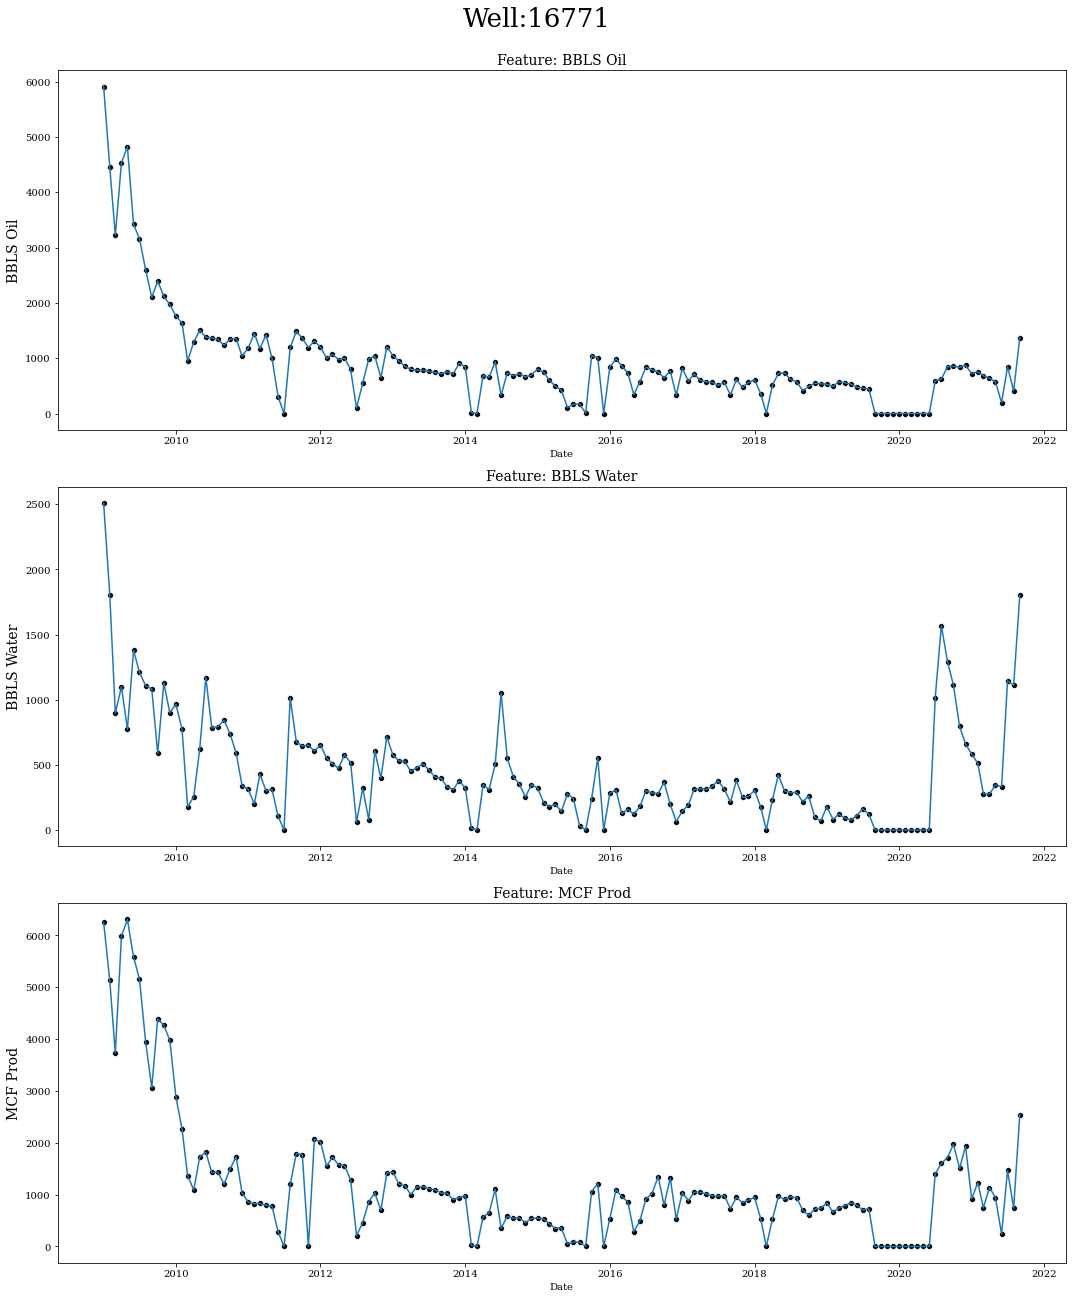

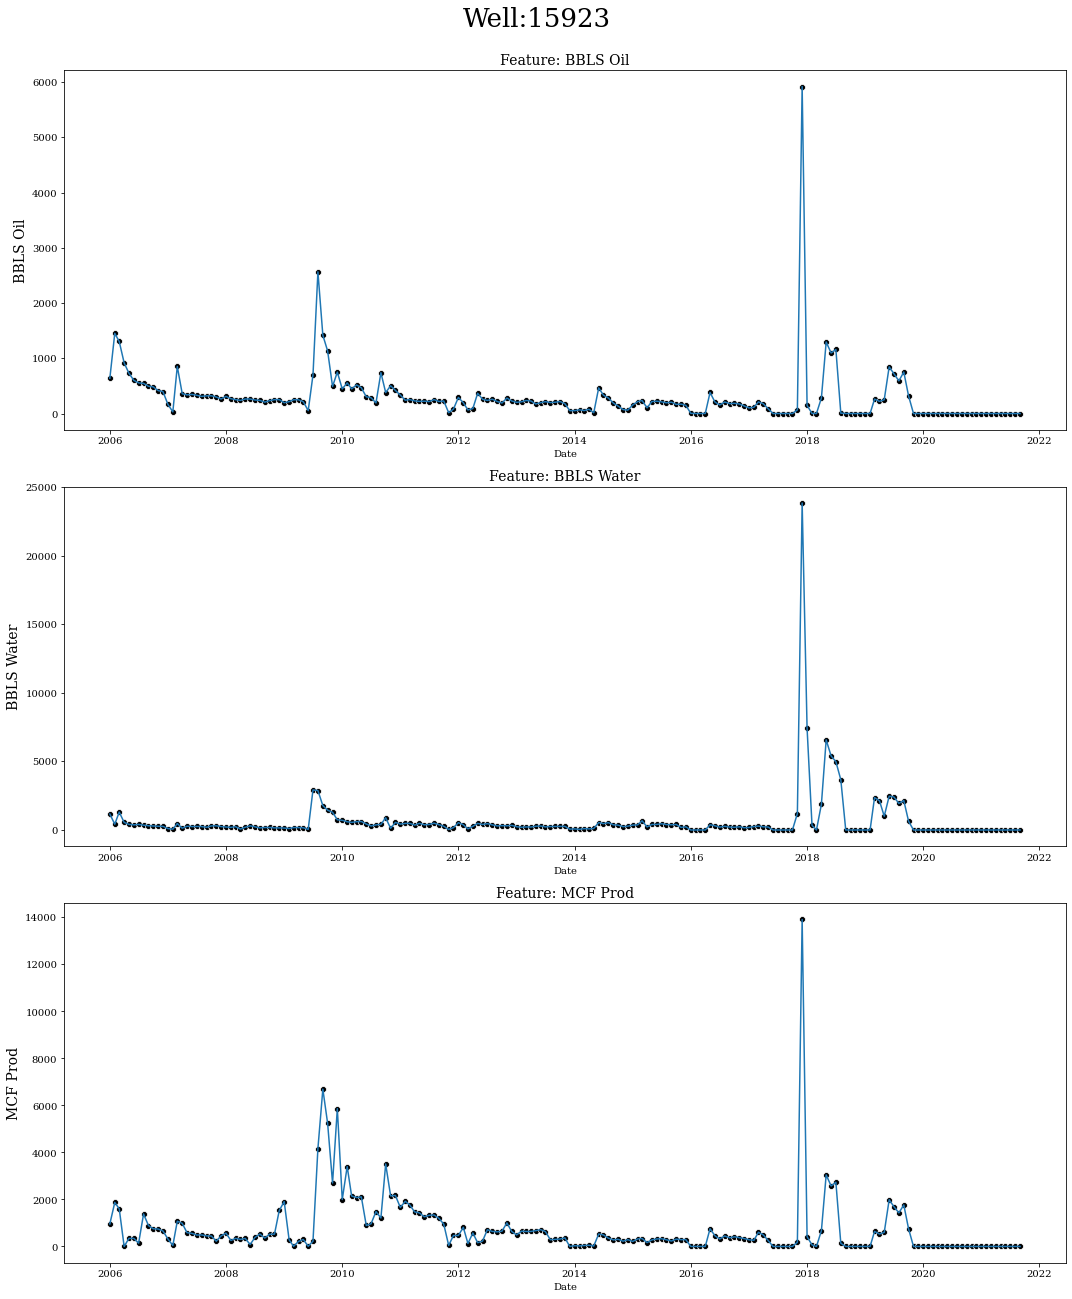

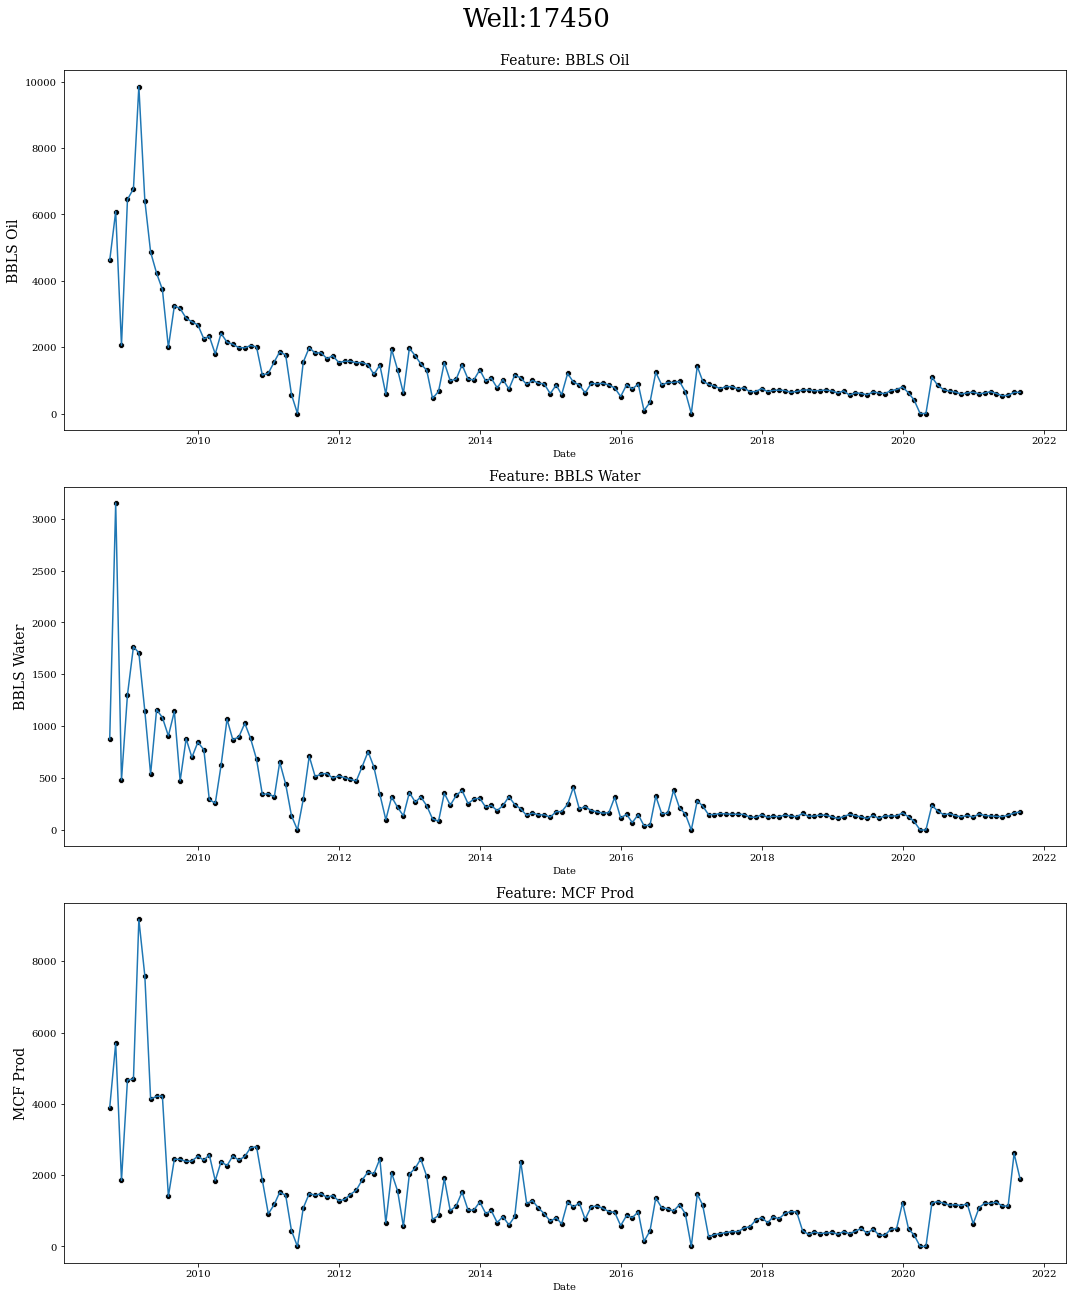

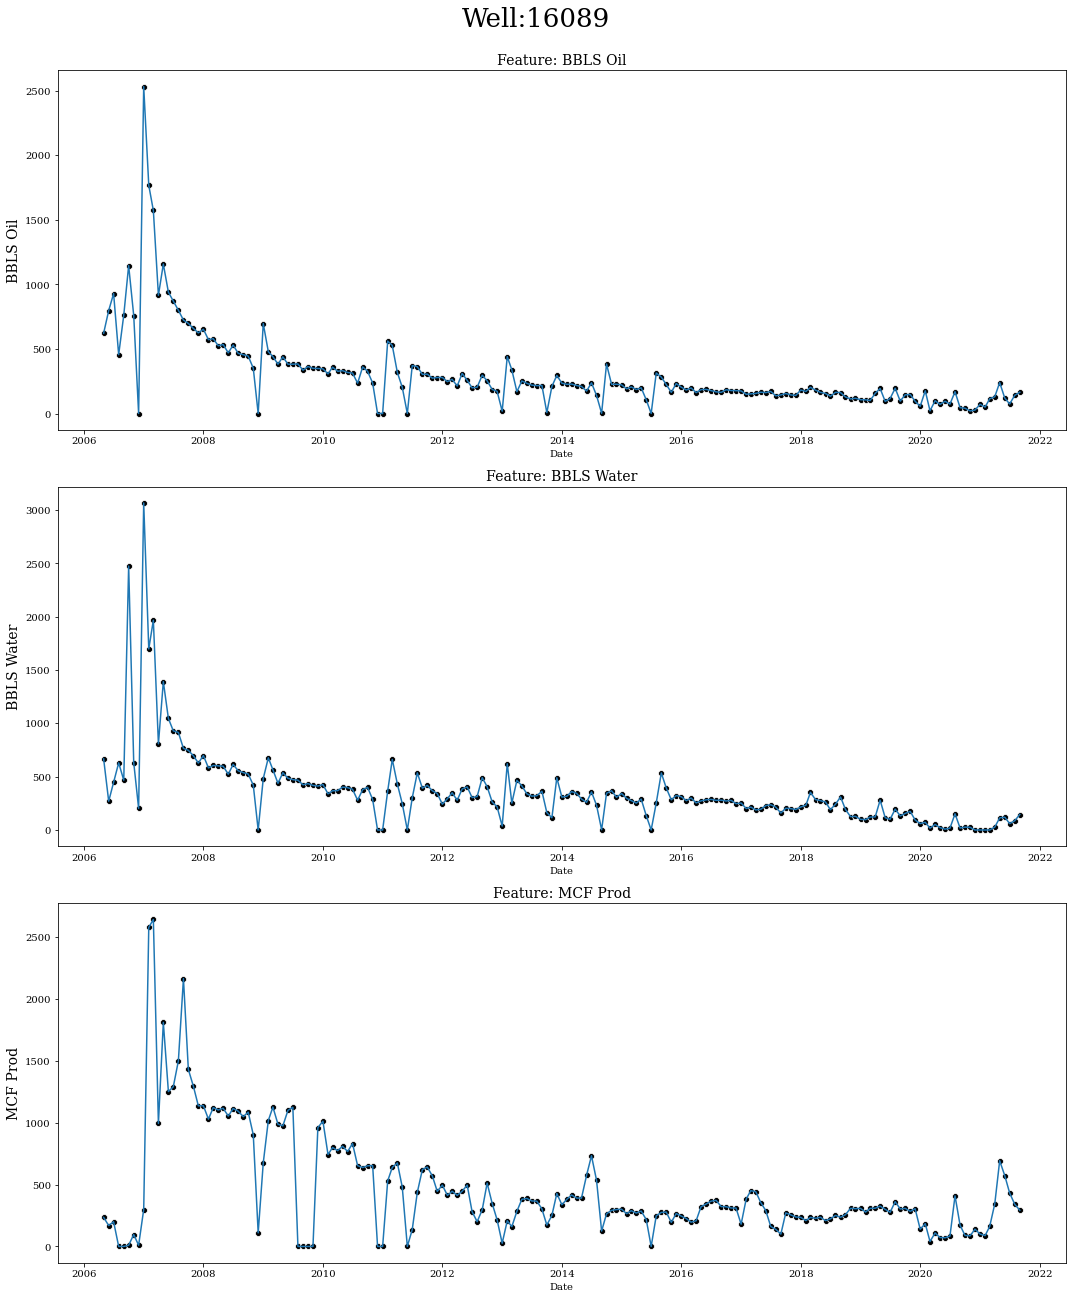

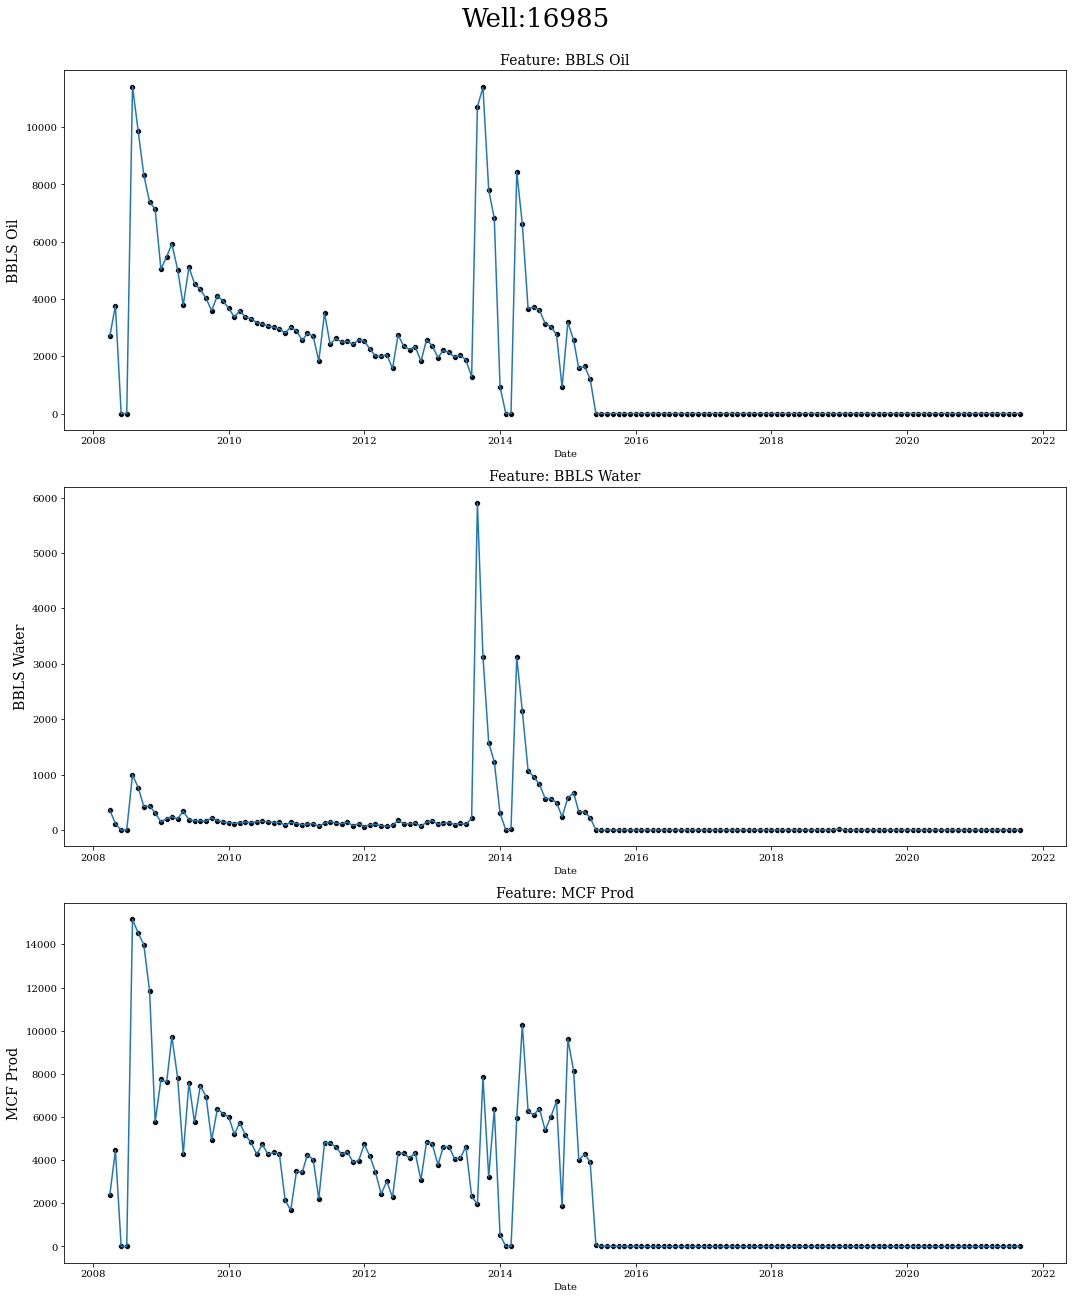

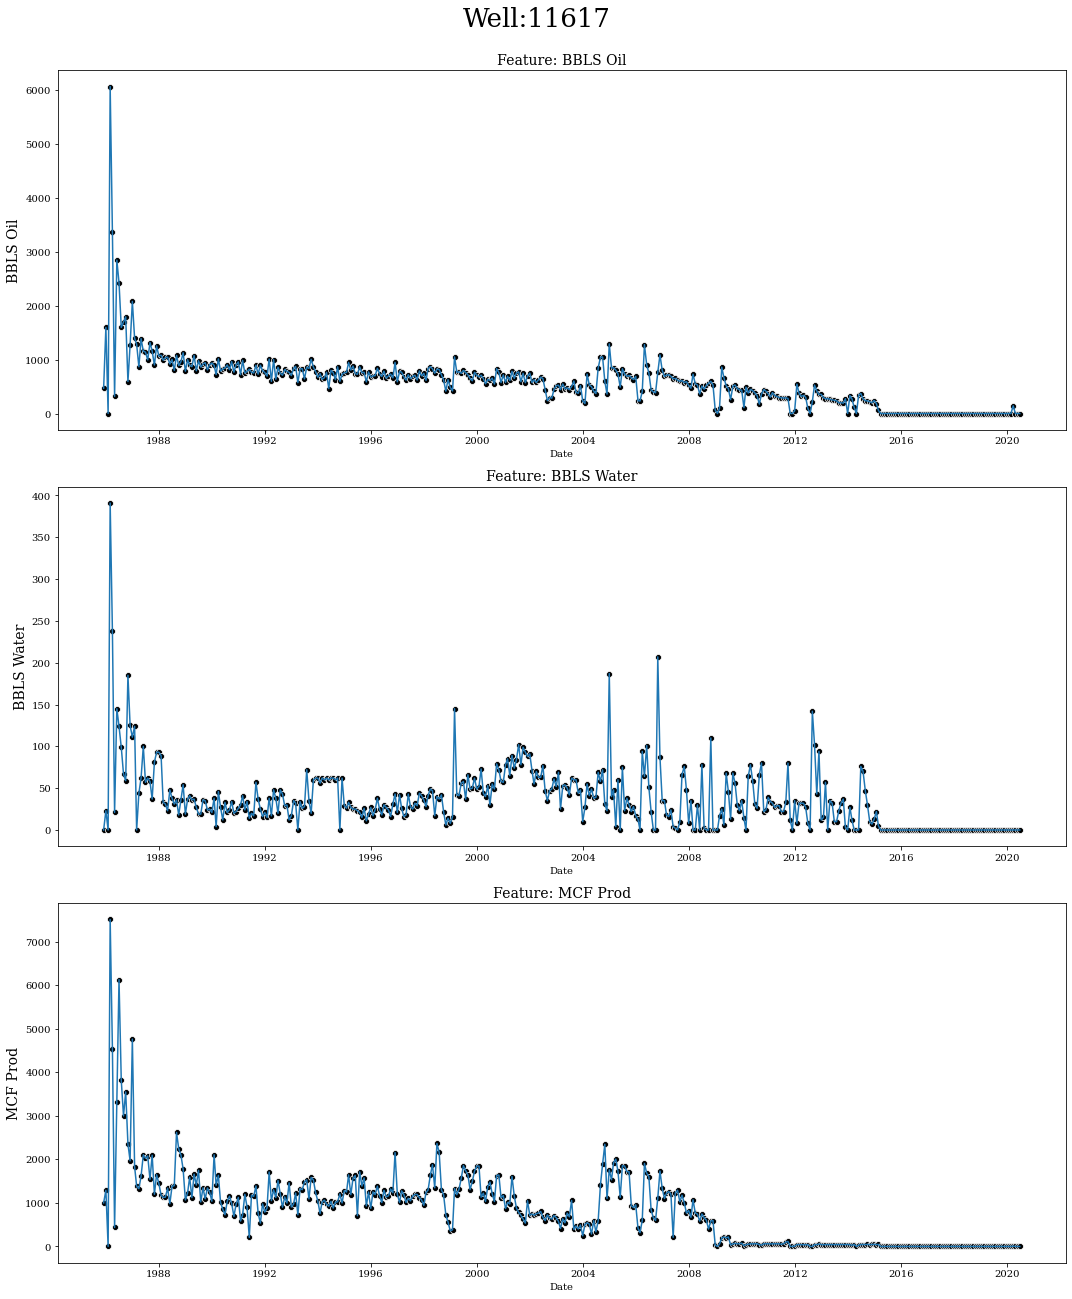

In [12]:
for d in df_list:
    feature_vis(d)

# 2. Data Processing

In [13]:
for df in df_list:
    print(df['delta'].sum()/31, df['delta'].count())

149 days 05:25:09.677419354 152
184 days 13:56:07.741935484 188
152 days 04:38:42.580645162 155
180 days 17:01:56.129032258 184
158 days 02:19:21.290322580 161
407 days 10:50:19.354838708 415


In [14]:
# Handling the missing data
#for df in df_list:
    #df = df.drop('delta', axis=1)
    #display(df.isna().sum())

In [15]:
# Smoothing the curve well1
'''def smoothing_vis(df):
    fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(16,18))

    sns.lineplot(df['Date'], df['MCF Prod'], ax=ax[0])
    sns.scatterplot(df['Date'], df['MCF Prod'], ax=ax[0])
    ax[0].set_title('MCF Prod', fontsize=14)
    resampled_df = df[['Date','MCF Prod']].resample('7D', on='Date').sum().reset_index(drop=False)
    sns.lineplot(resampled_df['Date'], resampled_df['MCF Prod'], ax=ax[1])
    sns.scatterplot(resampled_df['Date'], resampled_df['MCF Prod'], ax=ax[1])
    ax[1].set_title('Weekly MCF Prod', fontsize=14)
    resampled_df = df[['Date','MCF Prod']].resample('M', on='Date').sum().reset_index(drop=False)
    sns.lineplot(resampled_df['Date'], resampled_df['MCF Prod'], ax=ax[2])
    sns.scatterplot(resampled_df['Date'], resampled_df['MCF Prod'], ax=ax[2])
    ax[2].set_title('Monthly MCF Prod', fontsize=14)
    fig.suptitle('Well:'+str(df.Well_Id.iloc[1]), fontsize=18)
    plt.show()'''

"def smoothing_vis(df):\n    fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(16,18))\n\n    sns.lineplot(df['Date'], df['MCF Prod'], ax=ax[0])\n    sns.scatterplot(df['Date'], df['MCF Prod'], ax=ax[0])\n    ax[0].set_title('MCF Prod', fontsize=14)\n    resampled_df = df[['Date','MCF Prod']].resample('7D', on='Date').sum().reset_index(drop=False)\n    sns.lineplot(resampled_df['Date'], resampled_df['MCF Prod'], ax=ax[1])\n    sns.scatterplot(resampled_df['Date'], resampled_df['MCF Prod'], ax=ax[1])\n    ax[1].set_title('Weekly MCF Prod', fontsize=14)\n    resampled_df = df[['Date','MCF Prod']].resample('M', on='Date').sum().reset_index(drop=False)\n    sns.lineplot(resampled_df['Date'], resampled_df['MCF Prod'], ax=ax[2])\n    sns.scatterplot(resampled_df['Date'], resampled_df['MCF Prod'], ax=ax[2])\n    ax[2].set_title('Monthly MCF Prod', fontsize=14)\n    fig.suptitle('Well:'+str(df.Well_Id.iloc[1]), fontsize=18)\n    plt.show()"

Data already is varying by month so no upsampling needed.

# 3. Resampling and interpolation

In [16]:
# Resampling data to days for small data periods
'''rwell2=well2[['Date','MCF Prod','BBLS Oil', 'BBLS Water']].resample('1D', on='Date').sum().reset_index(drop=False)
rwell2['delta'] = rwell2['Date'] - rwell2['Date'].shift(1)
rwell3=well3[['Date','MCF Prod','BBLS Oil', 'BBLS Water']].resample('1D', on='Date').sum().reset_index(drop=False)
rwell3['delta'] = rwell3['Date'] - rwell3['Date'].shift(1)
rwell4=well4[['Date','MCF Prod','BBLS Oil', 'BBLS Water']].resample('1D', on='Date').sum().reset_index(drop=False)
rwell4['delta'] = rwell4['Date'] - rwell4['Date'].shift(1)
rwell6=well6[['Date','MCF Prod','BBLS Oil', 'BBLS Water']].resample('1D', on='Date').sum().reset_index(drop=False)
rwell6['delta'] = rwell6['Date'] - rwell6['Date'].shift(1)'''

"rwell2=well2[['Date','MCF Prod','BBLS Oil', 'BBLS Water']].resample('1D', on='Date').sum().reset_index(drop=False)\nrwell2['delta'] = rwell2['Date'] - rwell2['Date'].shift(1)\nrwell3=well3[['Date','MCF Prod','BBLS Oil', 'BBLS Water']].resample('1D', on='Date').sum().reset_index(drop=False)\nrwell3['delta'] = rwell3['Date'] - rwell3['Date'].shift(1)\nrwell4=well4[['Date','MCF Prod','BBLS Oil', 'BBLS Water']].resample('1D', on='Date').sum().reset_index(drop=False)\nrwell4['delta'] = rwell4['Date'] - rwell4['Date'].shift(1)\nrwell6=well6[['Date','MCF Prod','BBLS Oil', 'BBLS Water']].resample('1D', on='Date').sum().reset_index(drop=False)\nrwell6['delta'] = rwell6['Date'] - rwell6['Date'].shift(1)"

No missing data detected, which mean that no interpolation or filling is required.

# 4. Checking Timeseries Models Creteria 

In [17]:
def visual_season(df):
    # A year has 12 months (52 weeks * 7 days per week) aporx.
    rolling_window = 12
    f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 11))

    sns.lineplot(x=df['Date'], y=df['BBLS Oil'], ax=ax[0], color='dodgerblue')
    sns.lineplot(x=df['Date'], y=df['BBLS Oil'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
    sns.lineplot(x=df['Date'], y=df['BBLS Oil'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
    ax[0].set_title('BBLS Oil: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
    ax[0].set_ylabel(ylabel='BBLS Oil', fontsize=14)

    sns.lineplot(x=df['Date'], y=df['MCF Prod'], ax=ax[1], color='dodgerblue')
    sns.lineplot(x=df['Date'], y=df['MCF Prod'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
    sns.lineplot(x=df['Date'], y=df['MCF Prod'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
    ax[1].set_title('MCF Prod: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
    ax[1].set_ylabel(ylabel='MCF Prod', fontsize=14)
    f.suptitle('Well:'+str(df.Well_Id.iloc[1]), fontsize=26)
    plt.tight_layout()
    plt.show()

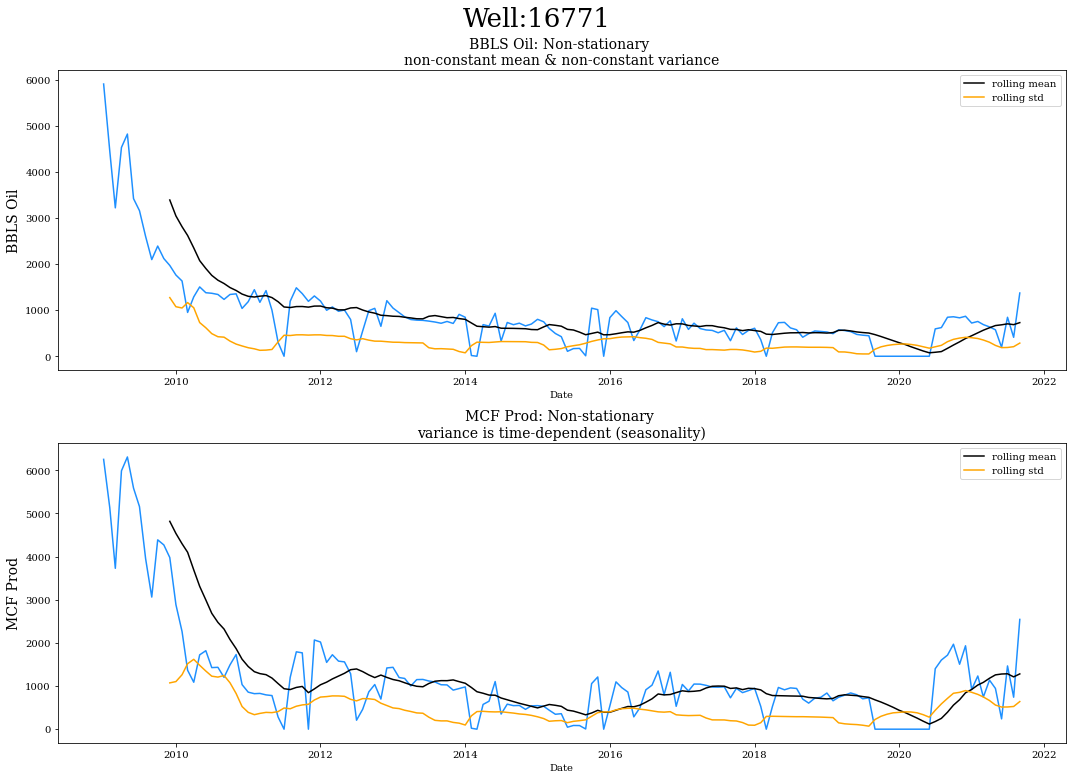

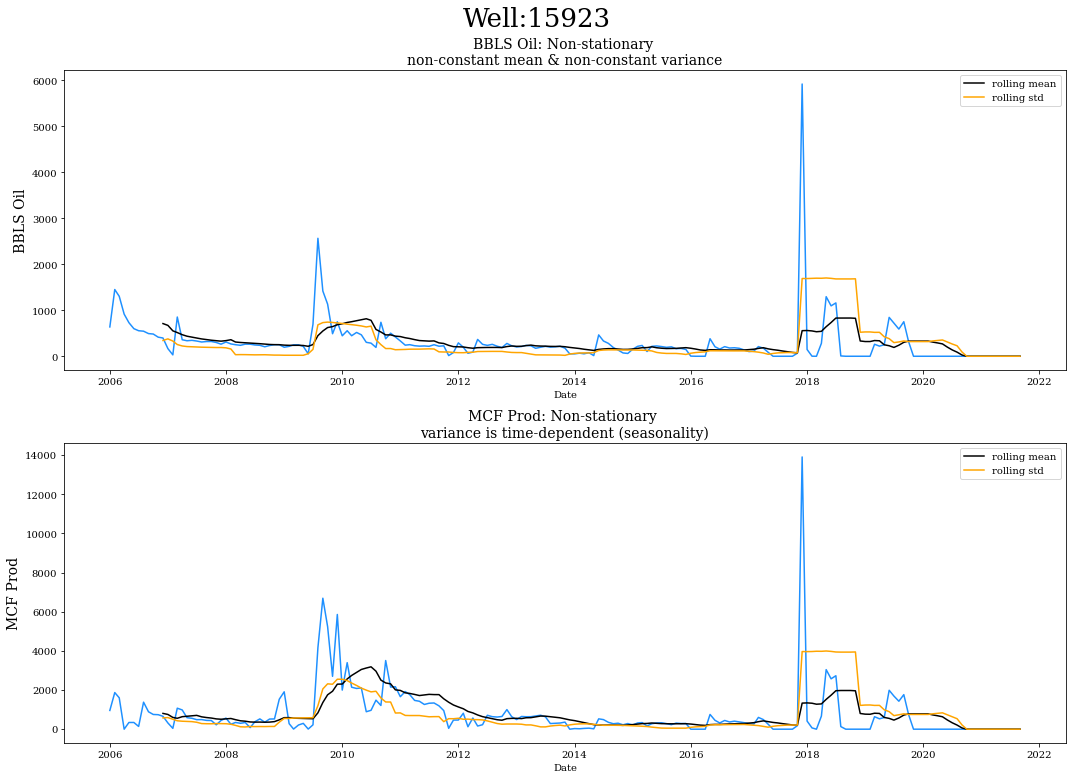

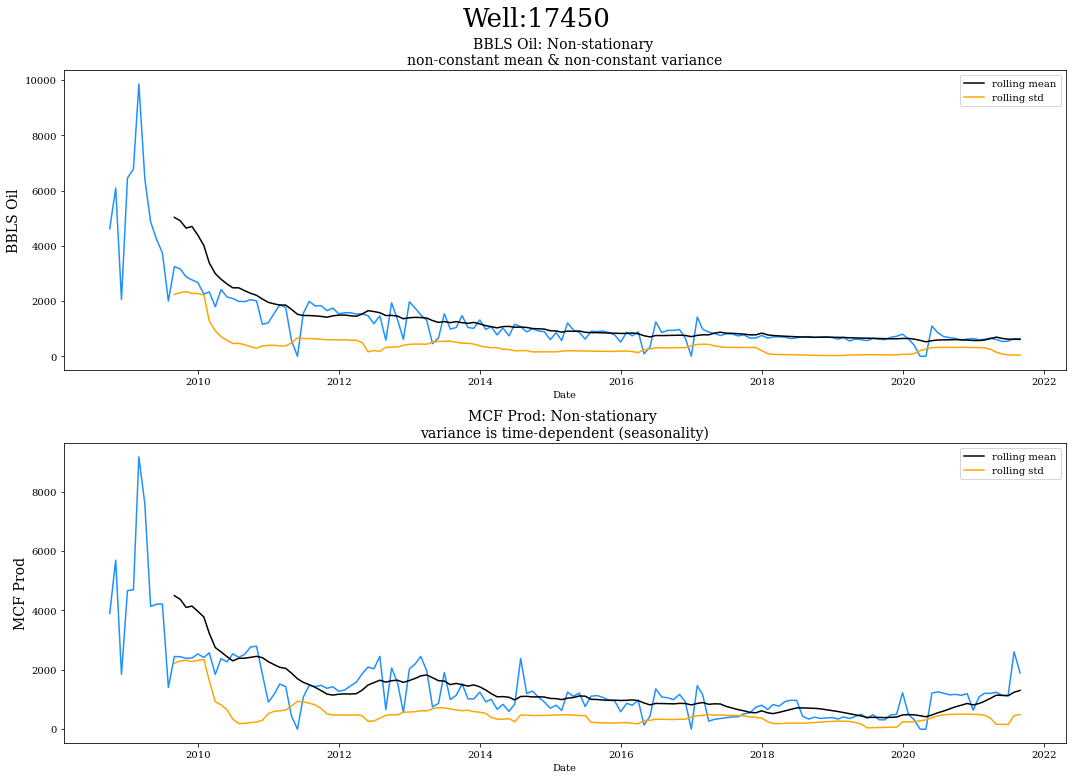

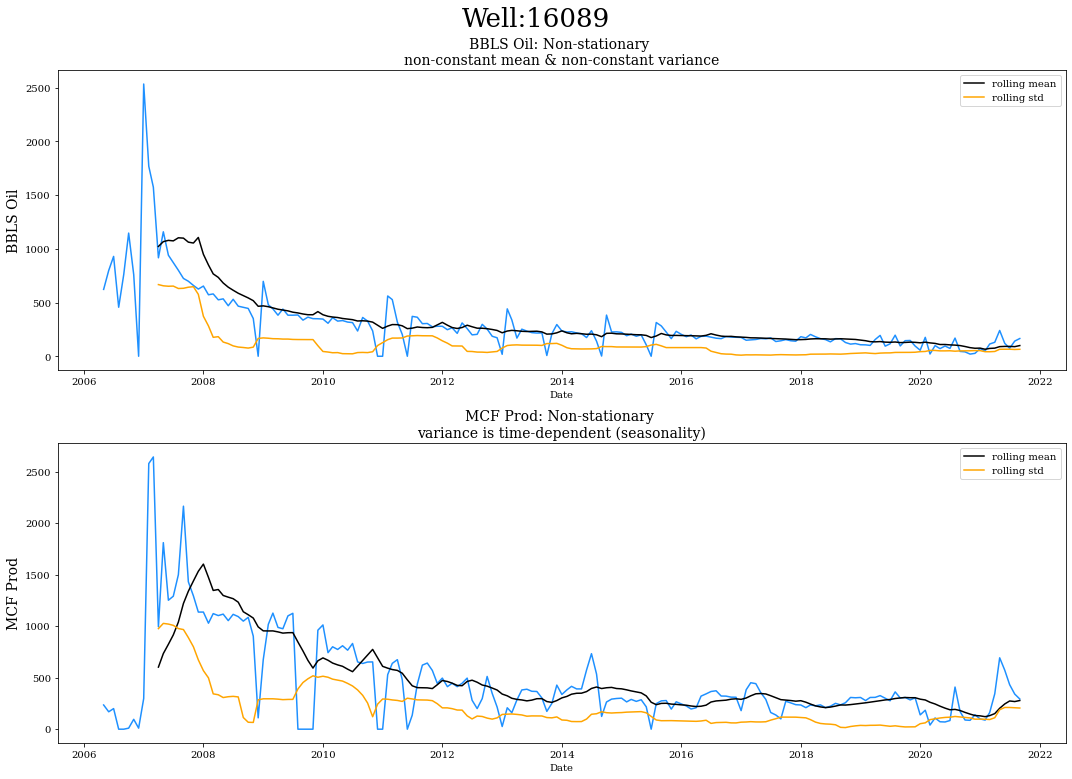

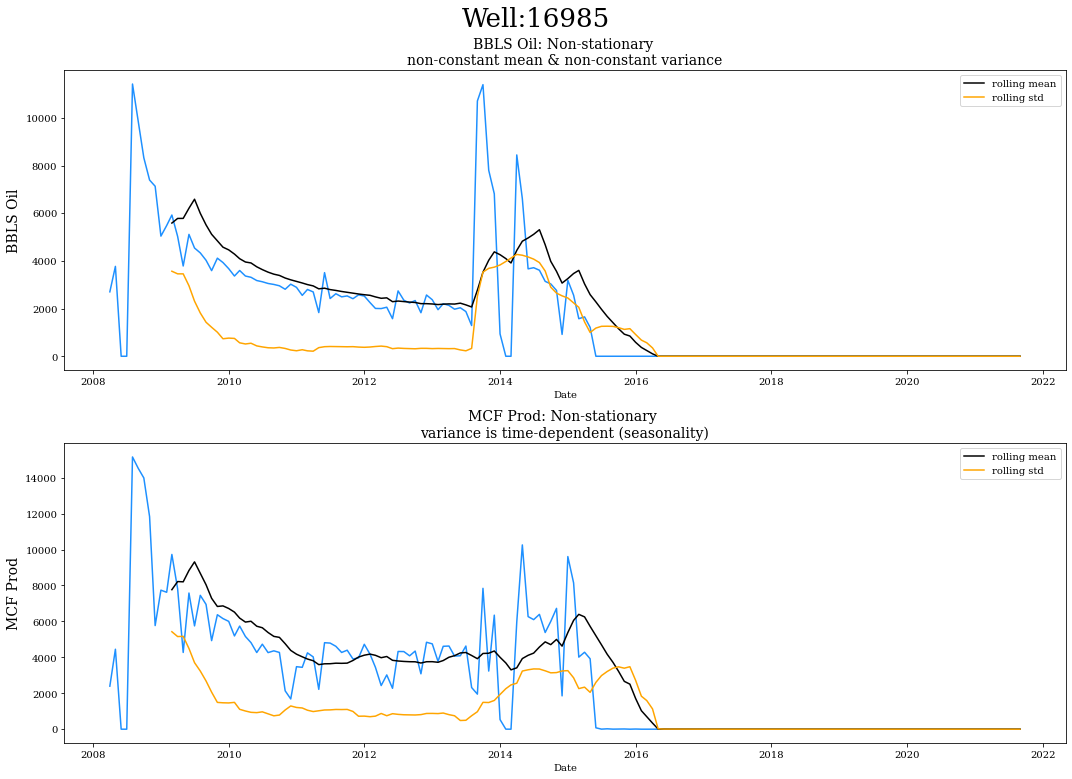

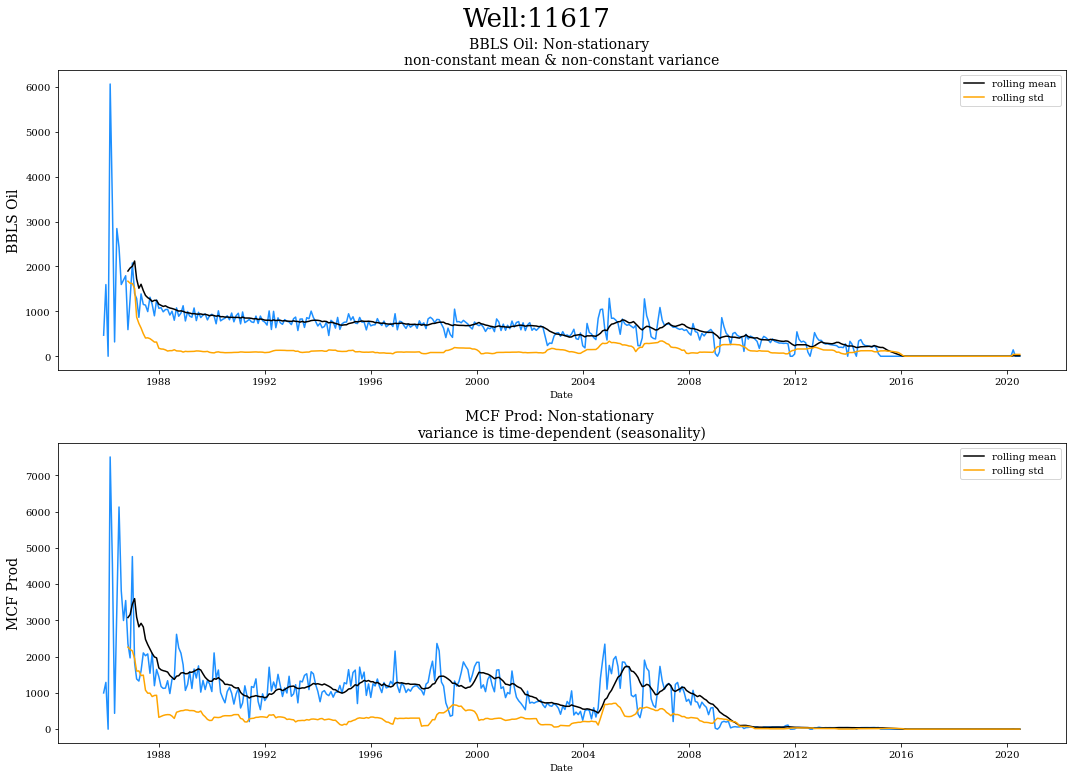

In [18]:
for d in df_list:
    visual_season(d)

# 5. Augmented Dickey-Fuller Unit Root Test

There are two ways to rejects the null hypothesis -> (Time series has no unit root -> (Time series is stationary))

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

* <font color='red'>**p-value > significance level (default: 0.05)**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**p-value <= significance level (default: 0.05)**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.
    
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.
* <font color='red'>**ADF statistic > critical value**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**ADF statistic < critical value**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.

In [19]:
results=list()
for df in df_list:
    result = adfuller(df['BBLS Oil'].values)
    print(result)
    results.append(result)

(-5.851502465381587, 3.5803886380250665e-07, 3, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, 1951.165992916382)
(-10.859435243406393, 1.4591090741943918e-19, 0, 188, {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}, 2656.602714783806)
(-7.998939584043727, 2.3624485648536187e-12, 7, 148, {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}, 2030.4513150638263)
(-2.4110550032757376, 0.13864049559401875, 5, 179, {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}, 2012.4511468168334)
(-2.3781407110896087, 0.14800131110052822, 8, 153, {'1%': -3.473829775724492, '5%': -2.880622899711496, '10%': -2.5769448985432954}, 2483.6058266273776)
(-5.6229859321988345, 1.1339386945572535e-06, 6, 409, {'1%': -3.4464400156784927, '5%': -2.868632644097719, '10%': -2.5705481612974577}, 5047.008867058744)


In [20]:
def visualize_adfuller_results(df, series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['Date'], y=series, ax=ax, color=linecolor)
    sns.scatterplot(x=df['Date'], y=series, ax=ax, color="black")
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

def df_well(df):
    # Let's visualize it
    f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

    visualize_adfuller_results(df,df['BBLS Water'].values, 'BBLS Water', ax[0])
    visualize_adfuller_results(df,df['BBLS Oil'].values, 'BBLS Oil', ax[1])
    visualize_adfuller_results(df,df['MCF Prod'].values, 'MCF Prod', ax[2])

    #f.delaxes(ax[2, 1])
    f.suptitle('Well:'+str(df.Well_Id.iloc[1]), fontsize=26, y=1)
    plt.tight_layout()
    plt.show()

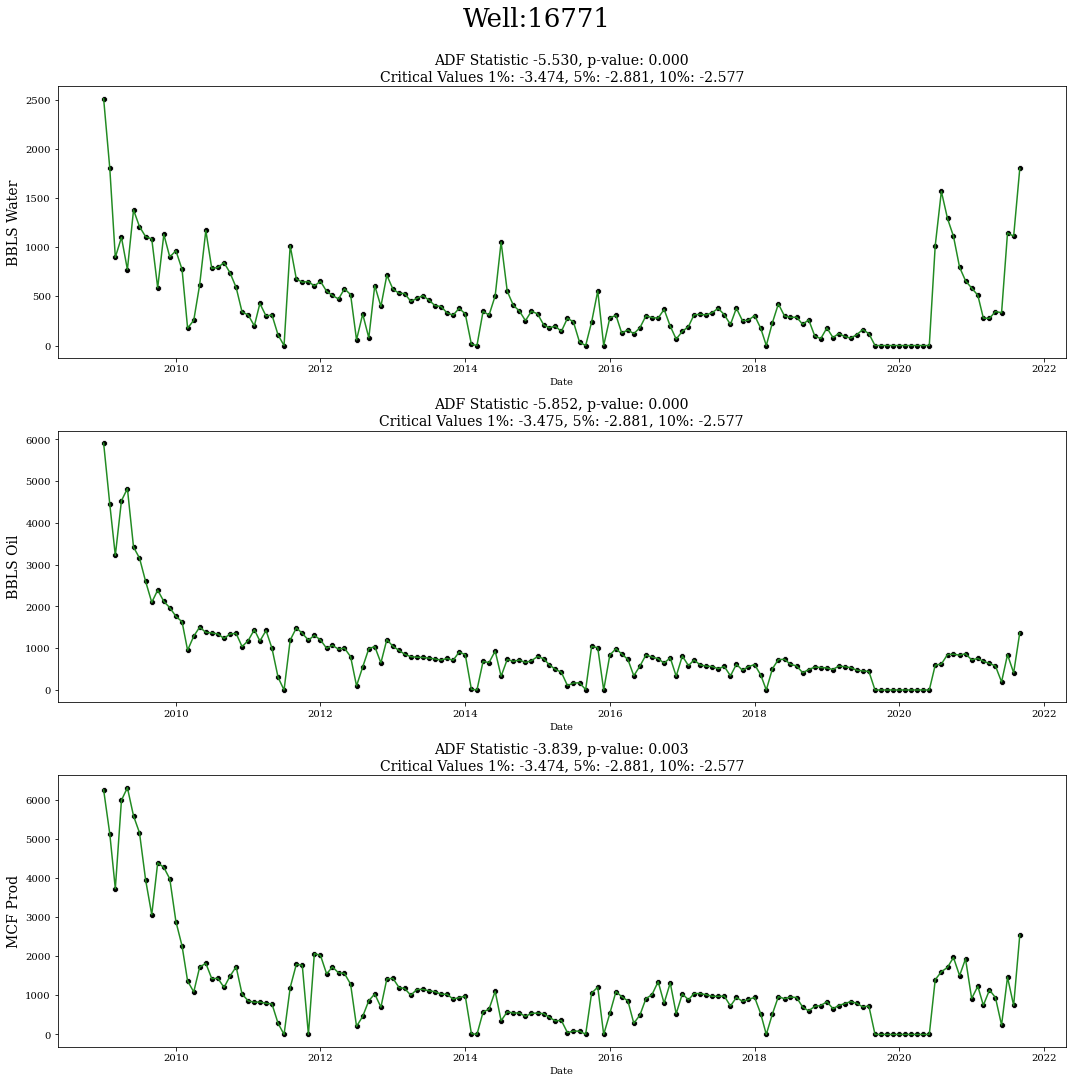

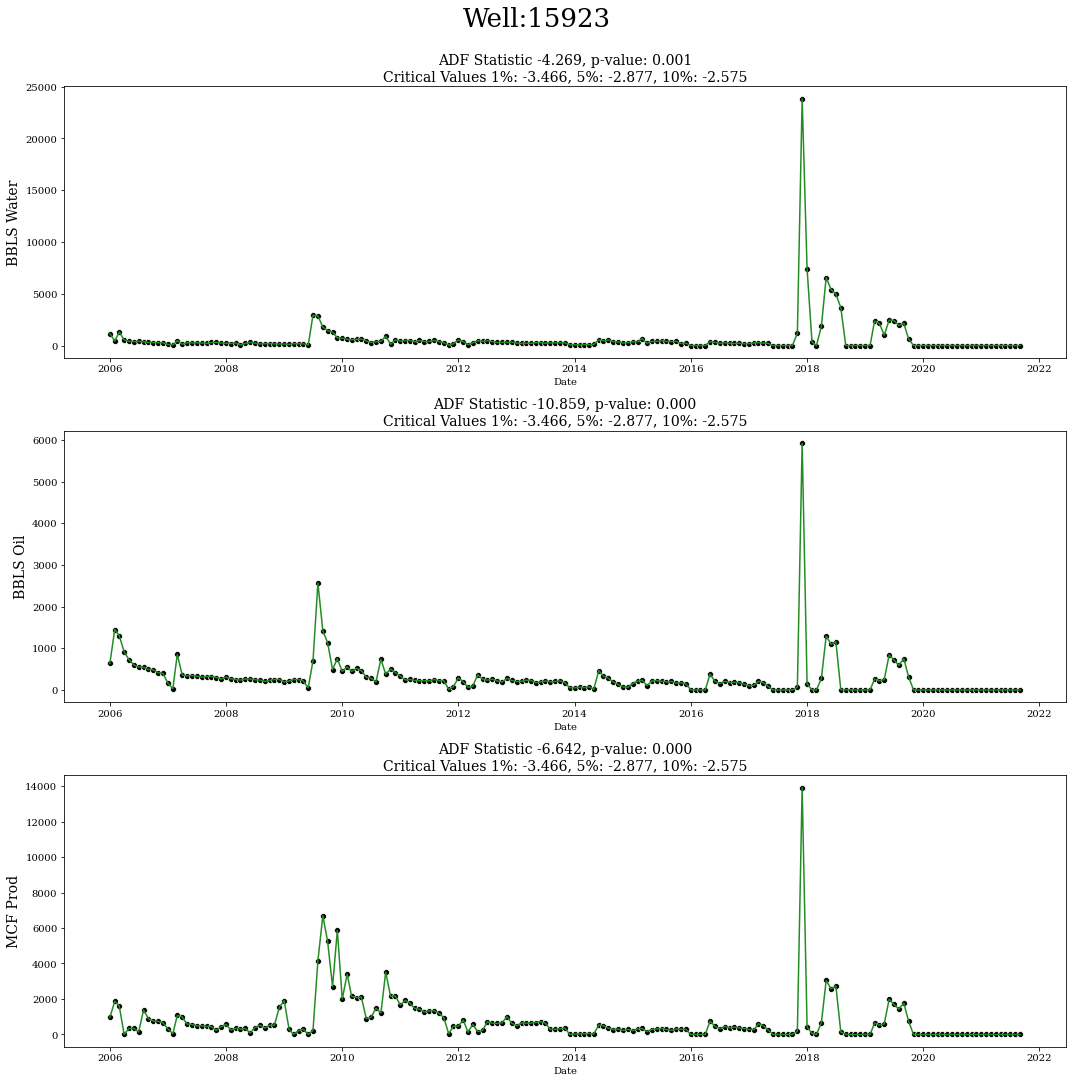

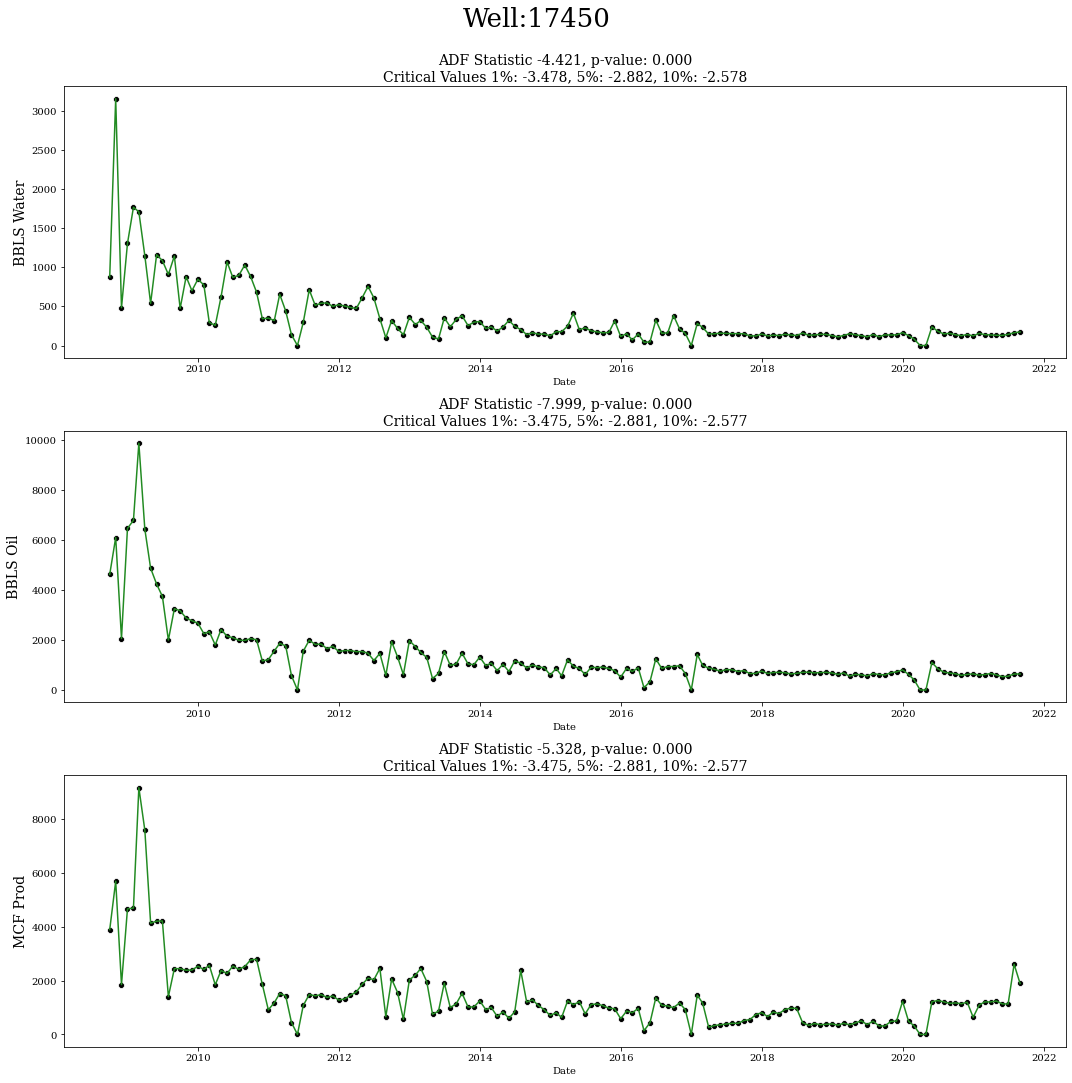

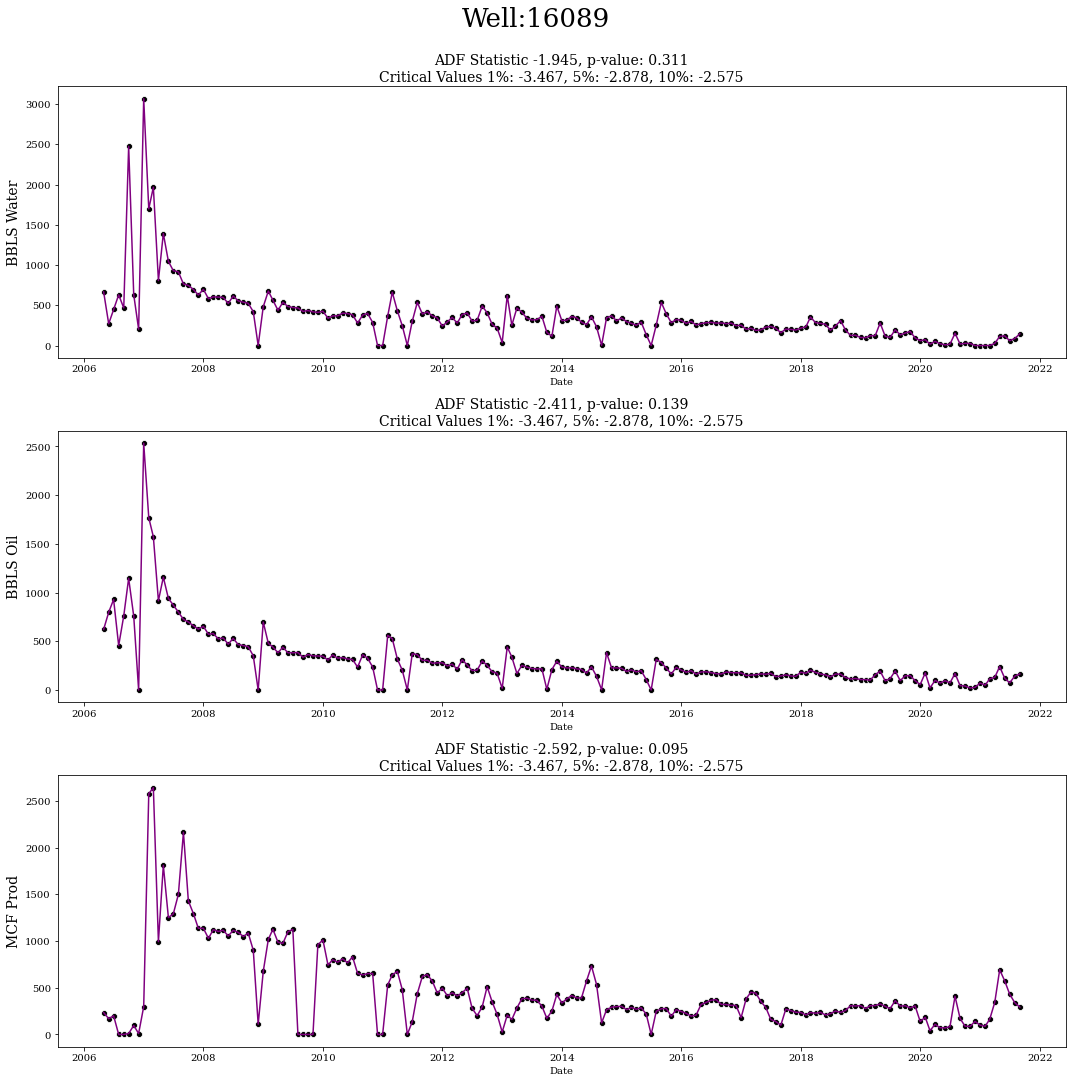

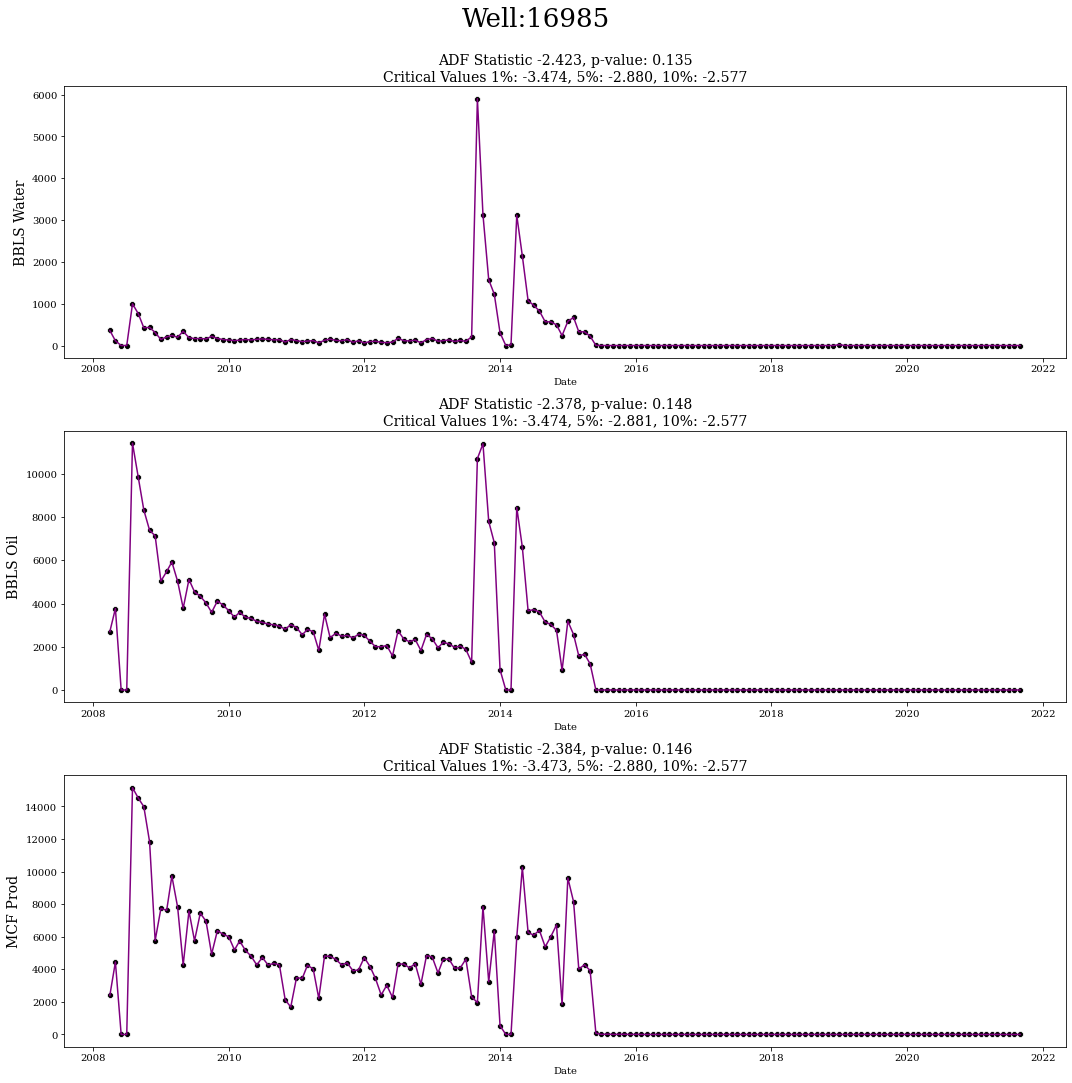

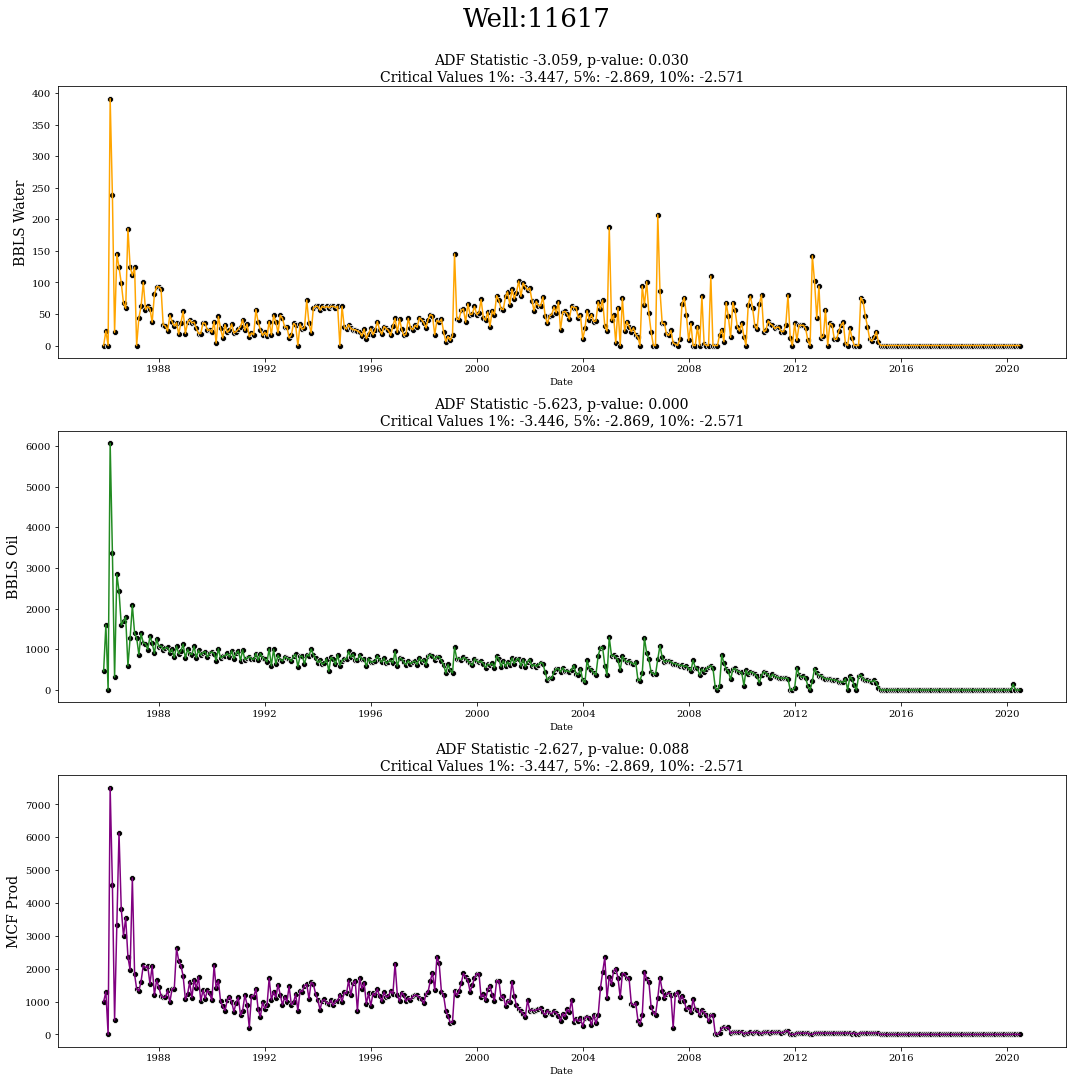

In [21]:
for d in df_list:
    df_well(d)

Since the primary three datasets are stationary, we'll use them to build the time series models. In other hand the remaining wells can be potentionally converted to stationary via transformation or differencing but that would onlu complicate the final model combination.

In [22]:
# Some feature engineering
df_list_fe=df_list
for df in df_list_fe:
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['day'] = pd.DatetimeIndex(df['Date']).day
    df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
    df['week_of_year'] = pd.DatetimeIndex(df['Date']).weekofyear
    df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
    df['season'] = df['month'] % 12 // 3 + 1
    display(df[['Date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head())

Date  year  month  day  day_of_year  week_of_year  quarter  season
0 2009-01-01  2009      1    1            1             1        1       1
1 2009-02-01  2009      2    1           32             5        1       1
2 2009-03-01  2009      3    1           60             9        1       2
3 2009-04-01  2009      4    1           91            14        2       2
4 2009-05-01  2009      5    1          121            18        2       2

Date  year  month  day  day_of_year  week_of_year  quarter  season
0 2006-01-01  2006      1    1            1            52        1       1
1 2006-02-01  2006      2    1           32             5        1       1
2 2006-03-01  2006      3    1           60             9        1       2
3 2006-04-01  2006      4    1           91            13        2       2
4 2006-05-01  2006      5    1          121            18        2       2

Date  year  month  day  day_of_year  week_of_year  quarter  season
0 2008-10-01  2008     10    1          275            40        4       4
1 2008-11-01  2008     11    1          306            44        4       4
2 2008-12-01  2008     12    1          336            49        4       1
3 2009-01-01  2009      1    1            1             1        1       1
4 2009-02-01  2009      2    1           32             5        1       1

Date  year  month  day  day_of_year  week_of_year  quarter  season
0 2006-05-01  2006      5    1          121            18        2       2
1 2006-06-01  2006      6    1          152            22        2       3
2 2006-07-01  2006      7    1          182            26        3       3
3 2006-08-01  2006      8    1          213            31        3       3
4 2006-09-01  2006      9    1          244            35        3       4

Date  year  month  day  day_of_year  week_of_year  quarter  season
0 2008-04-01  2008      4    1           92            14        2       2
1 2008-05-01  2008      5    1          122            18        2       2
2 2008-06-01  2008      6    1          153            22        2       3
3 2008-07-01  2008      7    1          183            27        3       3
4 2008-08-01  2008      8    1          214            31        3       3

Date  year  month  day  day_of_year  week_of_year  quarter  season
0 1985-12-01  1985     12    1          335            48        4       1
1 1986-01-01  1986      1    1            1             1        1       1
2 1986-02-01  1986      2    1           32             5        1       1
3 1986-03-01  1986      3    1           60             9        1       2
4 1986-04-01  1986      4    1           91            14        2       2

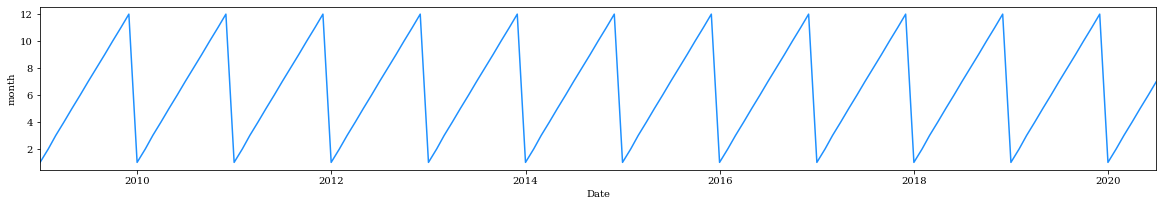

In [292]:
#df=df_list_fe[0]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['Date'], y=df['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

In [23]:
month_in_year = 12
for df in df_list_fe:
    df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
    df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

The new time features are cyclical so we'll need to encode them so that they wouldn't confuse the model.

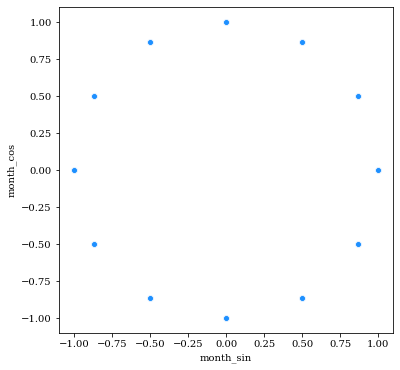

In [286]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

# 6. Timeseries decomposition

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

* **Level**: The average value in the series.
* **Trend**: The increasing or decreasing value in the series.
* **Seasonality**: The repeating short-term cycle in the series.
* **Noise**: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively:
* **Additive**: $y(t) = Level + Trend + Seasonality + Noise$
* **Multiplicative**: $y(t) = Level * Trend * Seasonality * Noise$

In [24]:
fe_well1, fe_well2, fe_well3, fe_well4, fe_well5, fe_well6 =df_list_fe

In [25]:
df_list_fe=[fe_well1, fe_well2, fe_well3]

In [26]:
core_columns =  ['BBLS Oil', 'BBLS Water','MCF Prod']

def decompos_ts(df):
    for column in core_columns:
        decomp = seasonal_decompose(df[column], period=12, model='additive', extrapolate_trend='freq')
        df[f"{column}_trend"] = decomp.trend
        df[f"{column}_seasonal"] = decomp.seasonal

In [27]:
for df in df_list_fe:
    decompos_ts(df)

In [28]:
def decompos_vis(df):
    fig, ax = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(21,10))

    for i, column in enumerate(['BBLS Oil', 'BBLS Water','MCF Prod']):

        res = seasonal_decompose(df[column], period=12, model='additive', extrapolate_trend='freq')

        ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
        res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
        ax[0,i].set_ylabel('Observed', fontsize=14)

        res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
        ax[1,i].set_ylabel('Trend', fontsize=14)

        res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
        ax[2,i].set_ylabel('Seasonal', fontsize=14)

        res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
        ax[3,i].set_ylabel('Residual', fontsize=14)
        
    fig.suptitle('Well:'+str(df.Well_Id.iloc[1]), fontsize=26, y=1)
    plt.show()

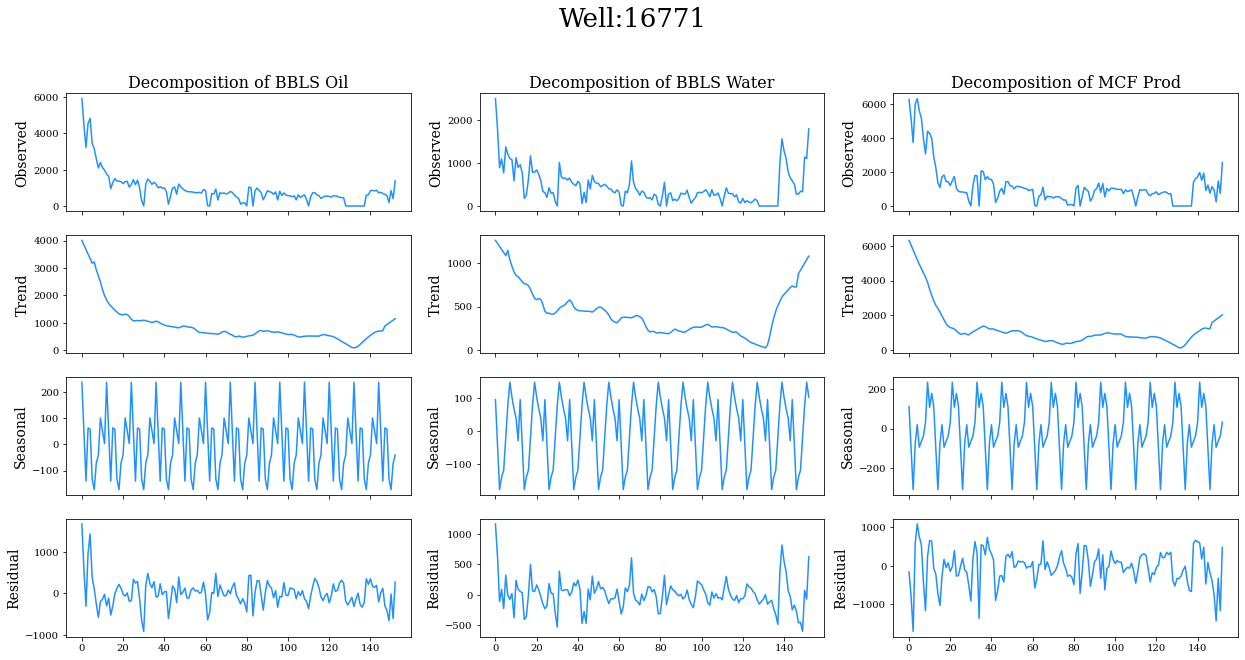

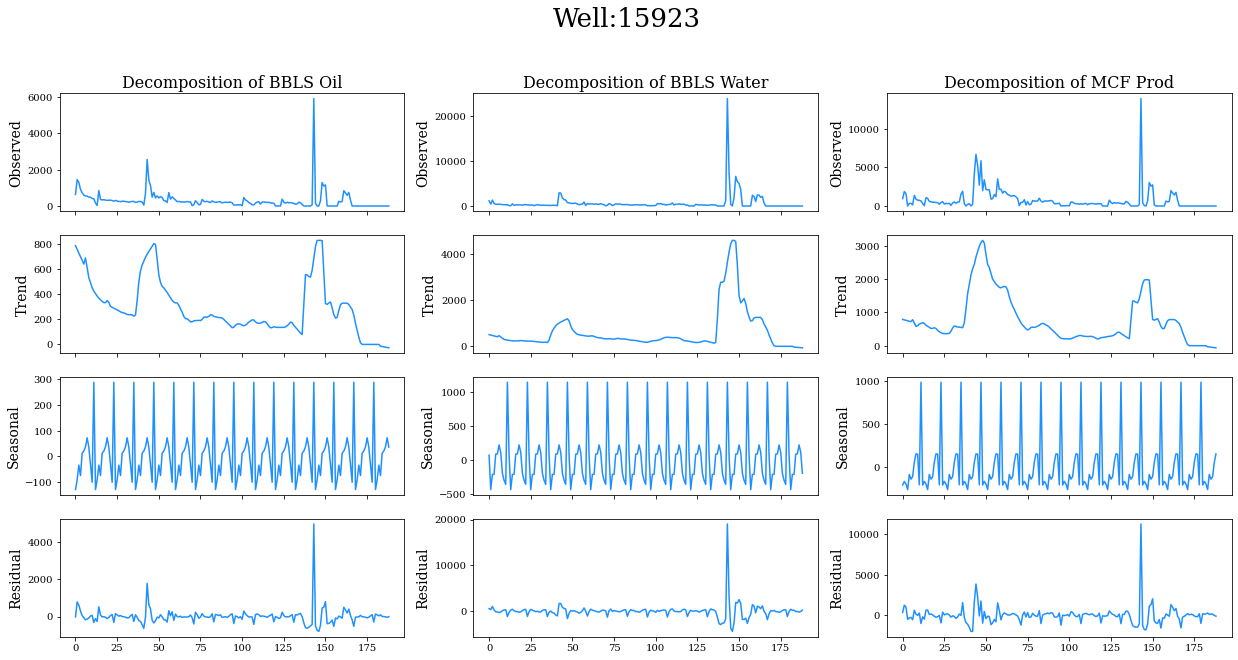

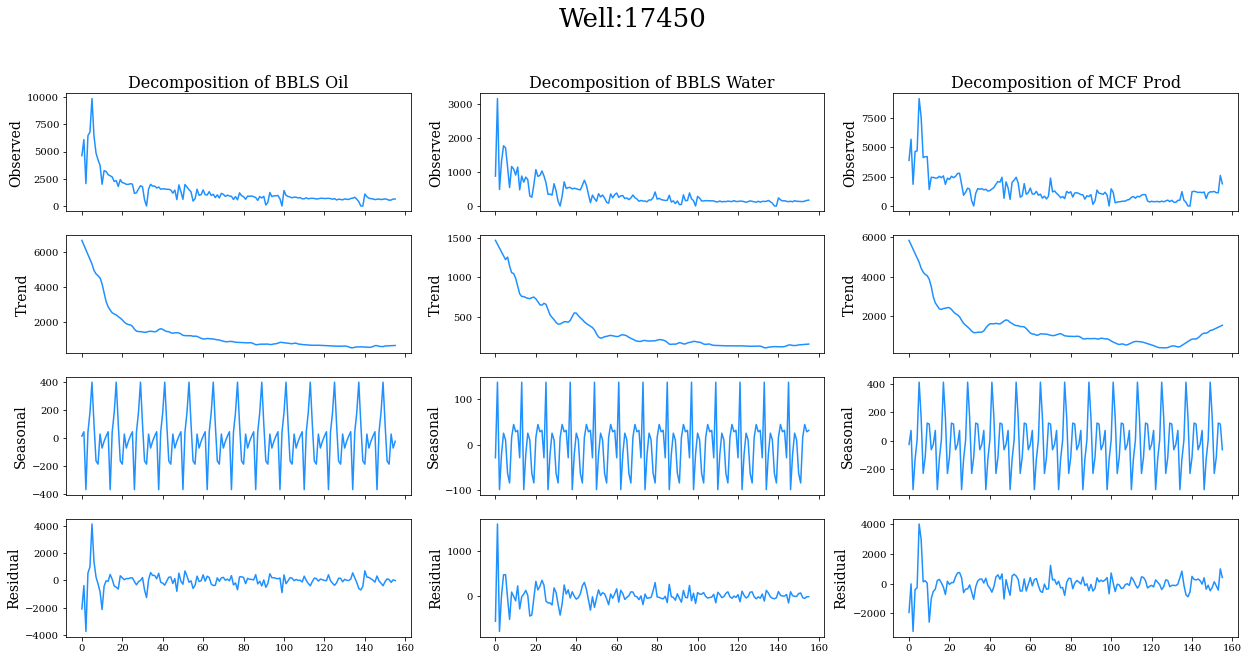

In [29]:
for df in df_list_fe:
    decompos_vis(df)

# 7. Lag computation
We want to calculate each variable with a shift() (lag) to compare the correlationwith the other variables.

In [30]:
for df in df_list_fe:
    for column in core_columns:
        df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2)
        df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1)
        df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1)
        df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2)
        df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3)

# 8. In depth EDA

In [31]:
def seasonal_comp(df):
    f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))
    f.suptitle('Well '+str(df.Well_Id.iloc[1])+' Seasonal Components of Features', fontsize=22, y=1)

    for i, column in enumerate(core_columns):
        sns.lineplot(x=df['Date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
        sns.scatterplot(x=df['Date'], y=df[column + '_seasonal'], ax=ax[i], color='black')
        ax[i].set_ylabel(ylabel=column, fontsize=14)

    plt.tight_layout()
    plt.show()

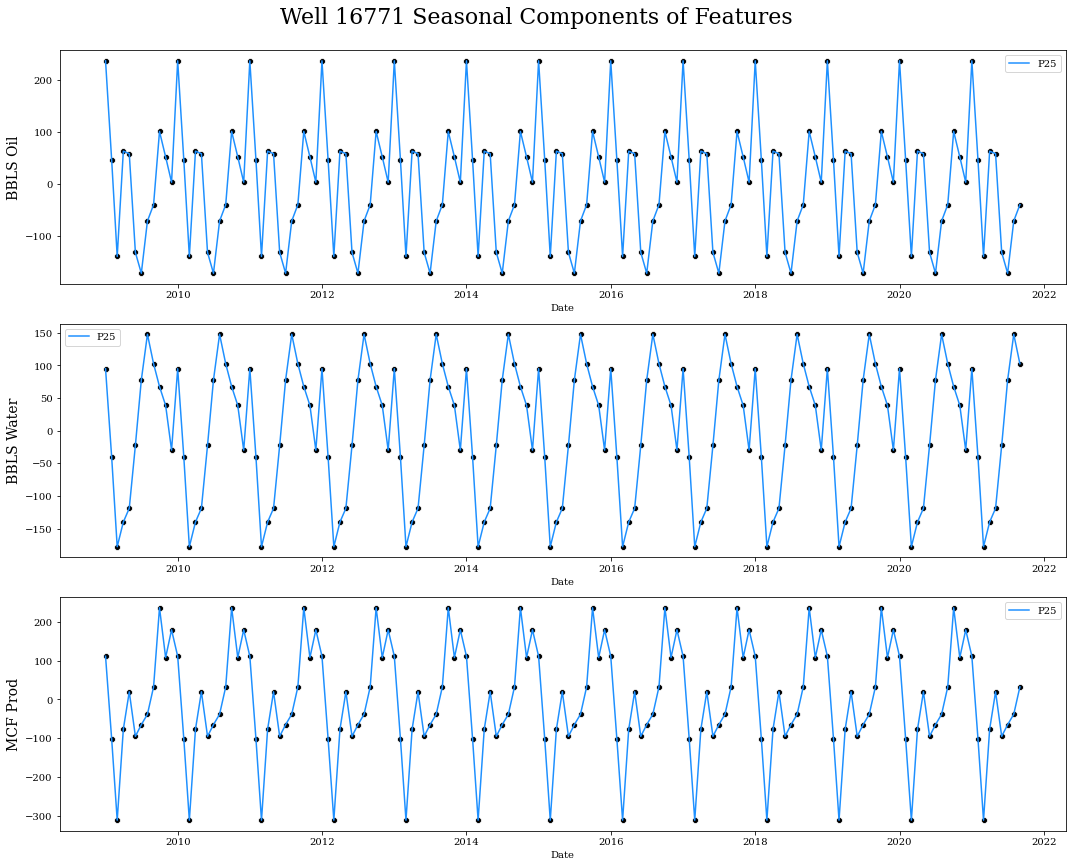

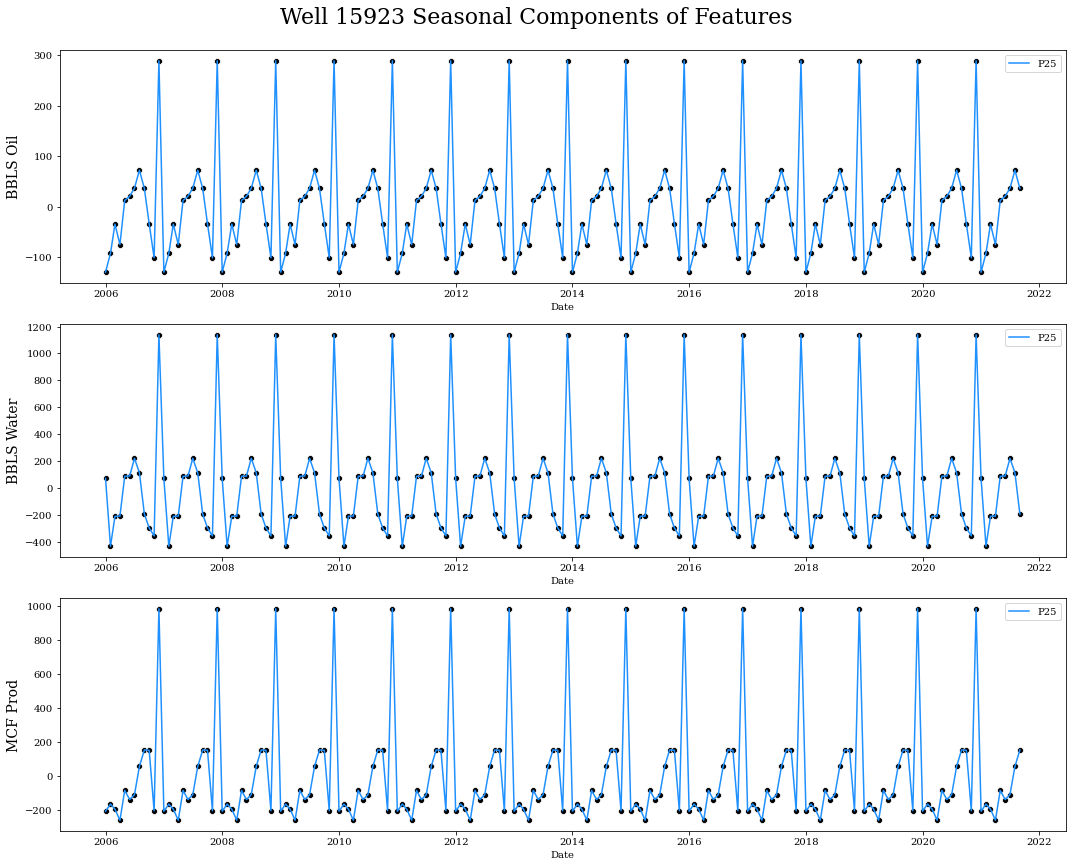

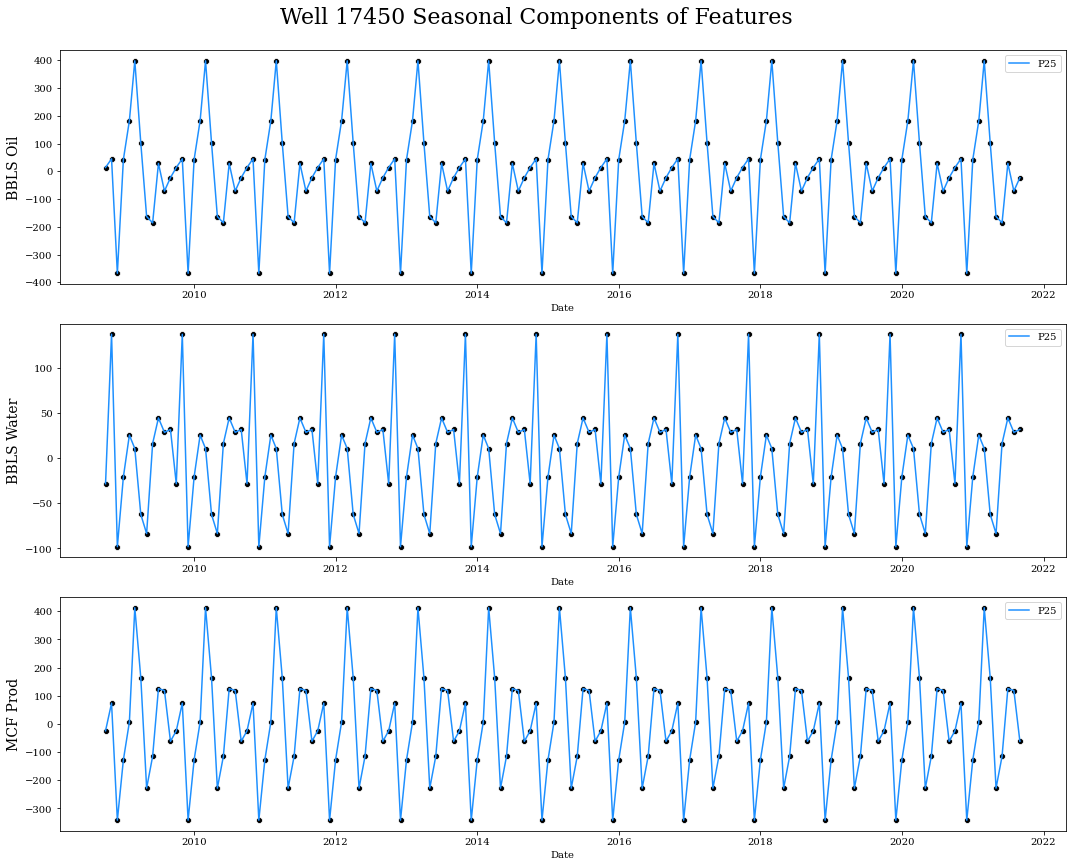

In [32]:
for df in df_list_fe:
    seasonal_comp(df)

We can clearly see that each well has a distinguished seasonal maximum and minimum value, which is related to the time the well is shut of to allow pressure recovery, These periods are respectively the same for the main components.

In [33]:
def corr_compar(df):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

    corrmat = df[core_columns].corr()

    sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
    ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

    shifted_cols = [
        'BBLS Oil_seasonal',         
        'BBLS Water_seasonal_shift_b_1m',
        'MCF Prod_seasonal_shift_1m'
    ]
    corrmat = df[shifted_cols].corr()

    sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
    ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)

    f.suptitle('Well '+str(df.Well_Id.iloc[1]), fontsize=22, y=1)
    plt.tight_layout()
    plt.show()

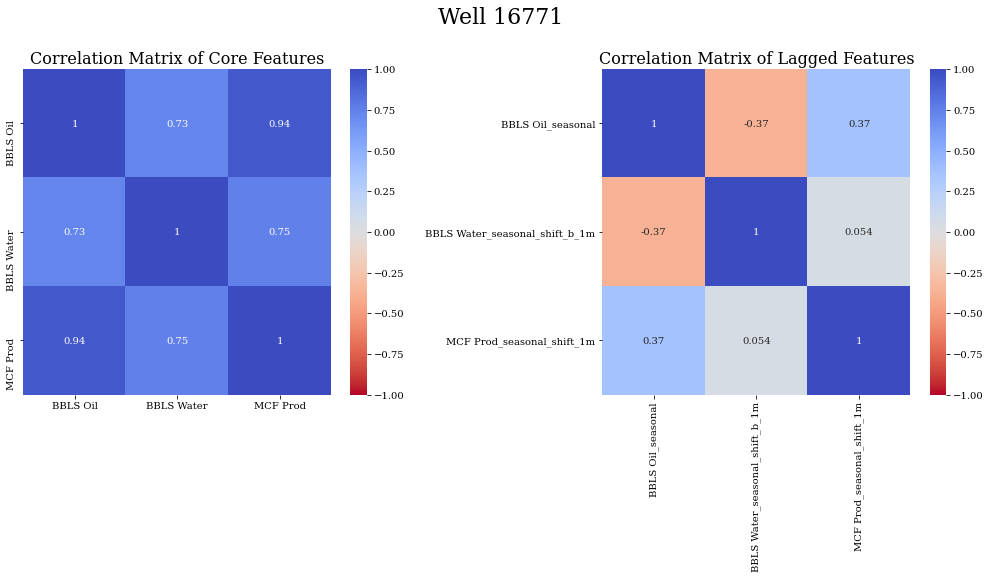

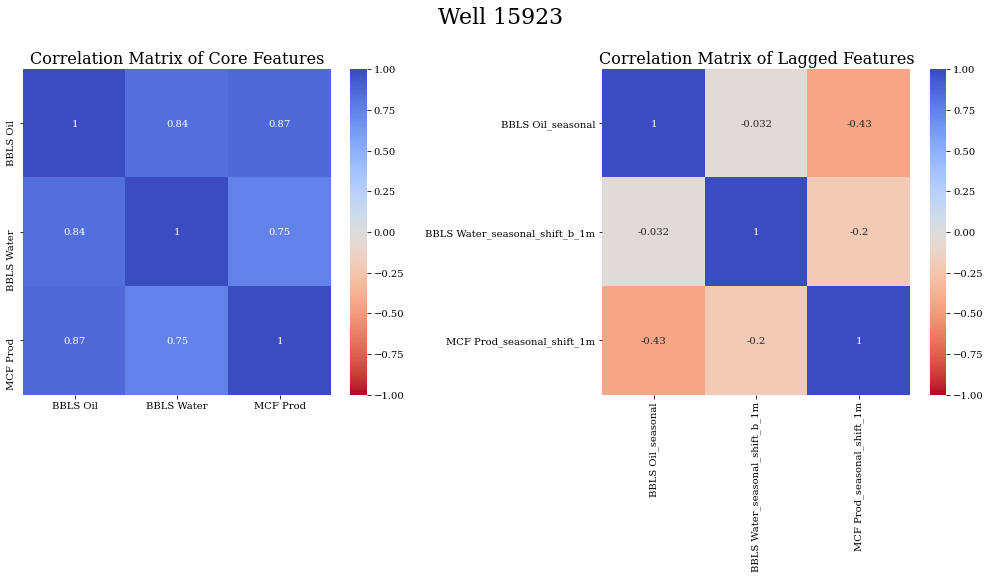

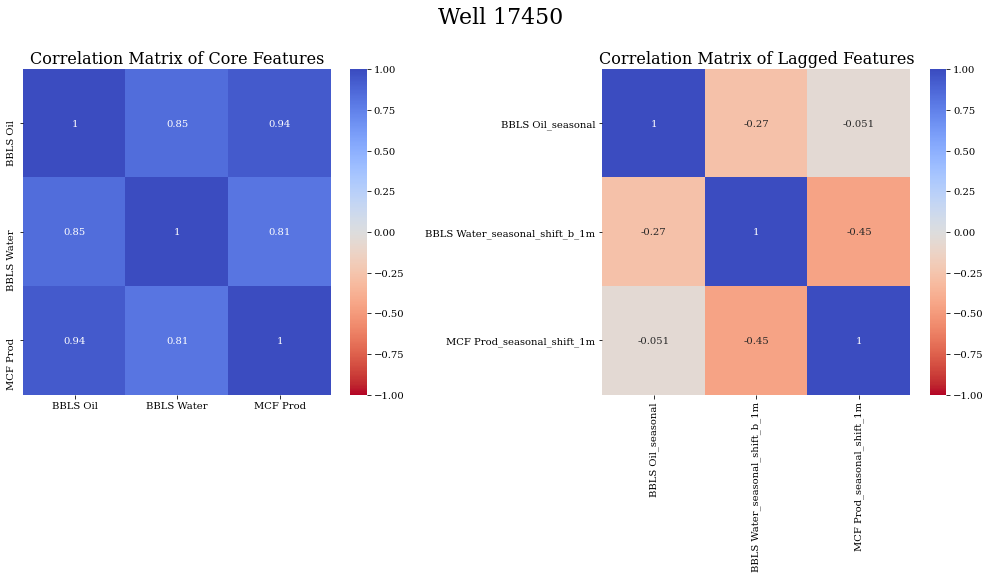

In [34]:
for df in df_list_fe:
    corr_compar(df)

Intrestingly enough the data is better correlated unshifted.

# 9. Autocorrelation Analysis

In [35]:
def ACA(df):
    f, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
    
    ts_diff = np.diff(df['BBLS Oil'])
    df['BBLS Oil_diff_1'] = np.append([0], ts_diff)
    
    plot_acf(df['BBLS Oil_diff_1'], lags=20, ax=ax[0])
    plot_pacf(df['BBLS Oil_diff_1'], lags=20, ax=ax[1])
    
    f.suptitle('Well '+str(df.Well_Id.iloc[1])+" Auto-correlation Analysis", fontsize=22, y=1)
    plt.tight_layout()
    plt.show()

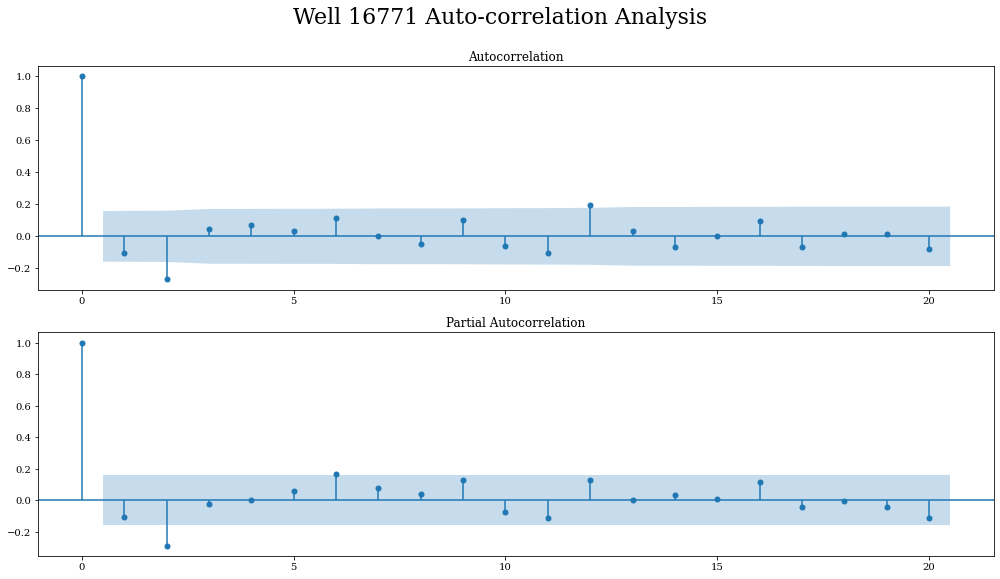

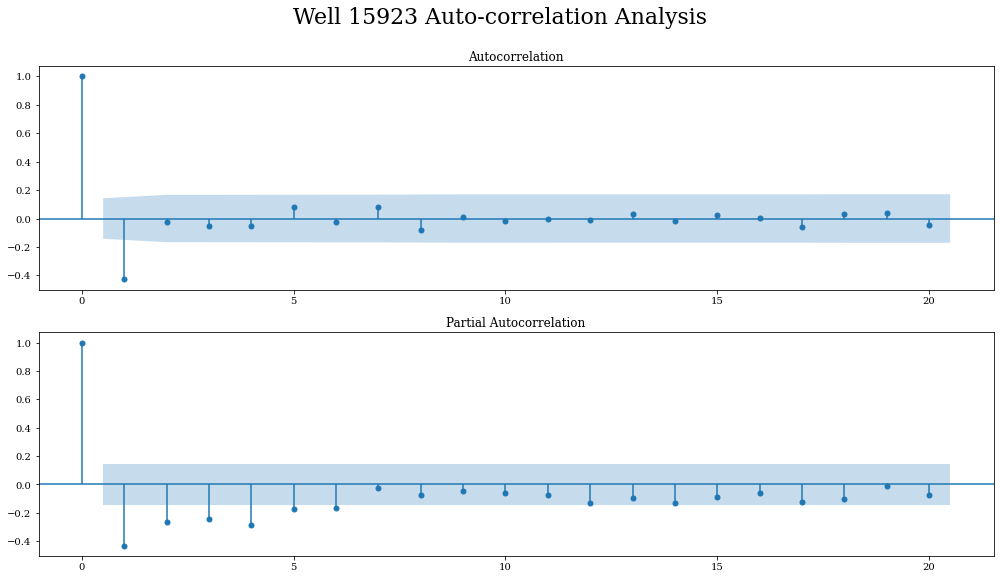

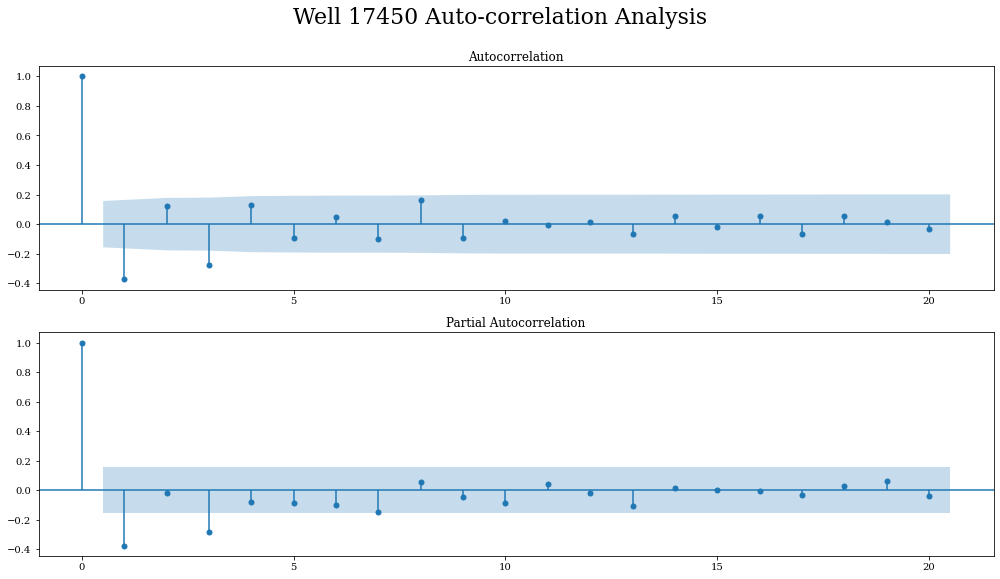

In [36]:
for df in df_list_fe:
    ACA(df)

# 10. Modeling

In [37]:
def ts_cs(df, y_label):
    N_SPLITS = 3

    X = df['Date']
    y = df[y_label]

    folds = TimeSeriesSplit(n_splits=N_SPLITS)

    f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

    for i, (train_index, valid_index) in enumerate(folds.split(X)):
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]

        sns.lineplot(
            x=X_train, 
            y=y_train, 
            ax=ax[i,0], 
            color='dodgerblue', 
            label='train'
        )
        sns.lineplot(
            x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
            y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
            ax=ax[i,1], 
            color='dodgerblue', 
            label='train'
        )

        for j in range(2):
            sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
        ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
        ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)


    plt.tight_layout()
    plt.show()

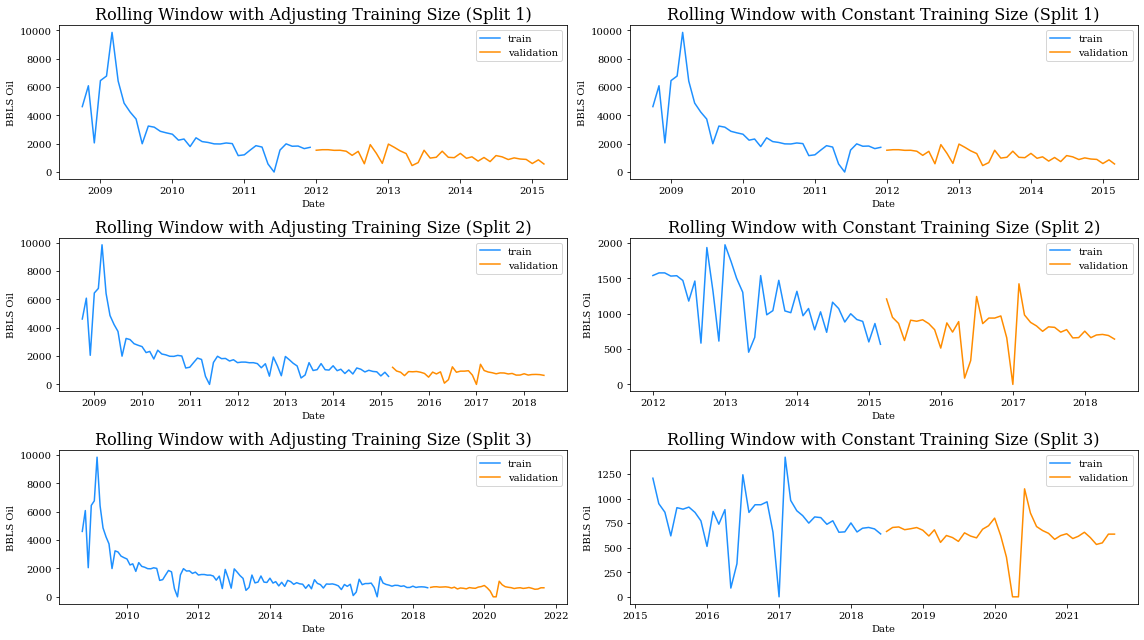

In [38]:
ts_cs(df_list_fe[2], 'BBLS Oil')

## 10.1 Models for Univariant TS

In [50]:
#!pip install statsmodels==0.11.0

In [39]:
#from fbprophet import Prophet
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [40]:
# Will take well one as an example for the rest of the application
df=df_list_fe[1]
train_size = int(0.95 * len(df))
test_size = len(df) - train_size

univariate_df = df[['Date', 'BBLS Oil']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

#return x_train, y_train,x_valid, y_valid

print(len(train), len(x_valid), len(x_train), len(y_train), len(x_valid), len(y_valid))

179 10 179 179 10 10


### 10.1.1 Facebook Prophet

In [ ]:
"""from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))"""

In [ ]:
"""# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()"""

### 10.1.2 Auto-Regressive Integrated Moving Average (ARIMA)

In [46]:
# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
#y_pred=model_fit.forecast(len(y_valid))
y_pred, se, conf = model_fit.forecast(len(y_valid))

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

RMSE: 150.8859144542411


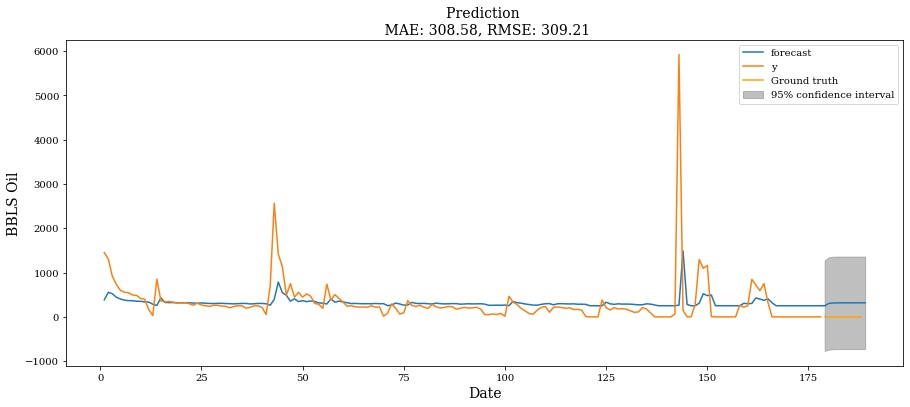

In [45]:
#from statsmodels.graphics.tsaplots import plot_predict
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_fit.plot_predict(1, len(x_valid)+ len(x_train), ax=ax)
#plot_predict(model_fit, dynamic=False)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='BBLS Oil', fontsize=14)

#ax.set_ylim(-35, -18)
plt.show()

In [61]:
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2760.724, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2811.497, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2779.668, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2790.014, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2758.762, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2775.298, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2760.519, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2763.107, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2759.310, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2775.275, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2762.414, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2756.748, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2754.979, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2754.141, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept

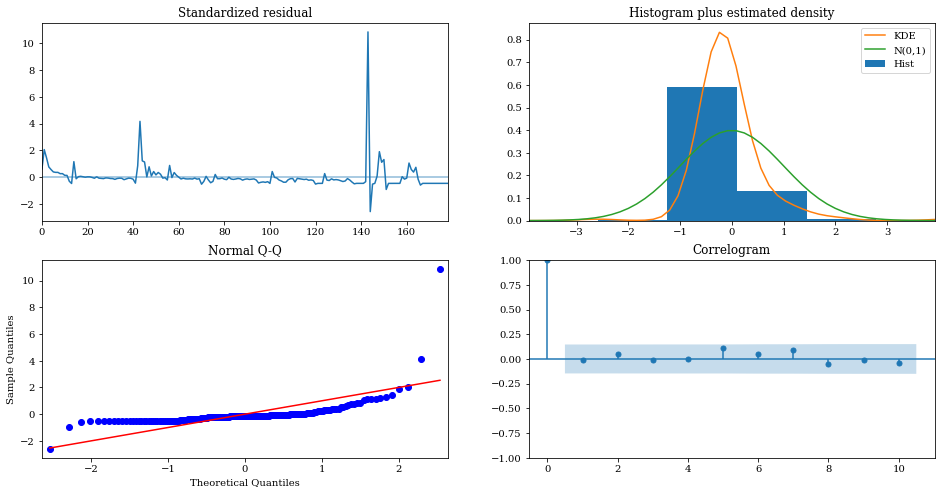

In [62]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

- The residual errors seem to fluctuate around a mean of zero and have a semi-uniform variance between (0, 10).
- The density plot suggest a skewed distribution with mean approximate to zero.
- The most part of the blue dots don't intersict with the red line, so it seems that the distribution is relatively skewed.
- The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated.

### LSTM

In [105]:
data=pd.read_csv('production_data_all_wells.csv')
well=data.loc[(data['Well_Id']==16771)]
well['Date'] = pd.to_datetime(well['Date'], format = '%m/%d/%Y')
well.sort_values(by='Date', ascending=True, inplace=True)
well.reset_index(inplace=True)
well.drop('index', axis=1, inplace=True)
well.drop(['Well_Id','Days','BBLS Water', 'MCF Prod'], axis=1, inplace=True)
well.to_csv('lstm_oil.csv')

In [128]:
import numpy as np
from pandas import Series
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from math import sqrt
import matplotlib.pyplot as plt


def parser(x):
    return datetime.strptime(x, '%m/%d/%Y')

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], X.shape[1],1 )
    model = Sequential()
    model.add(LSTM(neurons[0], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    #model.add(Dropout(0.3))
    #model.add(LSTM(neurons[1], return_sequences=False))
    #model.add(Dropout(0.3))
    #model.add(LSTM(neurons[2], return_sequences=False))
    #model.add(Dropout(0.3))
    # model.add(LSTM(neurons[3], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    # model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(nb_epoch):
        print('Epoch:',i)
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    
    return model
    

def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, len(X), 1)
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

def create_dataset(dataset, look_back=1):
    dataset = np.insert(dataset,[0]*look_back,0)    
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    dataY= np.array(dataY)        
    dataY = np.reshape(dataY,(dataY.shape[0],1))
    dataset = np.concatenate((dataX,dataY),axis=1)  
    return dataset

In [109]:
series = pd.read_csv('lstm_oil.csv', header=0,parse_dates=[0],index_col=0, squeeze=True,date_parser=parser)
raw_values = series.values

In [131]:
# transform data to be stationary
diff = difference(raw_values, 1)
# create dataset x,y
dataset = diff.values
dataset = create_dataset(dataset,look_back=10)

# split into train and test sets
train_size = int(dataset.shape[0] * 0.8)
train, test = dataset[0:train_size], dataset[train_size:]
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
look_back=10
neurons= [64, 2, 4 ] 
n_epochs=50

In [132]:
lstm_model = fit_lstm(train_scaled, 1, n_epochs, neurons)

Epoch: 0
121/121 [==============================] - 1s 3ms/step - loss: 0.0837
Epoch: 1
121/121 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch: 2
121/121 [==============================] - 0s 3ms/step - loss: 0.0822
Epoch: 3
121/121 [==============================] - 0s 3ms/step - loss: 0.0809
Epoch: 4
121/121 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch: 5
121/121 [==============================] - 0s 2ms/step - loss: 0.0777
Epoch: 6
121/121 [==============================] - 0s 3ms/step - loss: 0.0753
Epoch: 7
121/121 [==============================] - 0s 3ms/step - loss: 0.0737
Epoch: 8
121/121 [==============================] - 0s 2ms/step - loss: 0.0726
Epoch: 9
121/121 [==============================] - 0s 3ms/step - loss: 0.0713
Epoch: 10
121/121 [==============================] - 0s 2ms/step - loss: 0.0700
Epoch: 11
121/121 [==============================] - 0s 3ms/step - loss: 0.0686
Epoch: 12
121/121 [==============================]

In [133]:
lstm_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (1, 64)                   16896     
_________________________________________________________________
dense_3 (Dense)              (1, 1)                    65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [134]:
# forecast the entire training dataset to build up state for forecasting
print('Forecasting Training Data')   
predictions_train = list()
for i in range(len(train_scaled)):
    # make one-step forecast
    X, y = train_scaled[i, 0:-1], train_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(raw_values)-i)
    # store forecast
    predictions_train.append(yhat)
    expected = raw_values[ i+1 ] 
#        print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Forecasting Training Data


In [135]:
# report performance
rmse_train = sqrt(mean_squared_error(raw_values[1:len(train_scaled)+1], predictions_train))
print('Train RMSE: %.5f' % rmse_train)
#report performance using RMSPE
R2_train = r2_score(raw_values[1:len(train_scaled)+1],predictions_train)
print('Train R Squared: %.5f' % R2_train)
MAE_train = mean_absolute_error(raw_values[1:len(train_scaled)+1], predictions_train)
print('Train MAE: %.5f' % MAE_train)

Train RMSE: 321.41727
Train R Squared: 0.85179
Train MAE: 202.75131


In [136]:
# forecast the test data
print('Forecasting Testing Data')
predictions_test = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions_test.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Forecasting Testing Data
Day=1, Predicted=461.709181, Expected=573.000000
Day=2, Predicted=564.969815, Expected=557.000000
Day=3, Predicted=528.054651, Expected=535.000000
Day=4, Predicted=511.823837, Expected=474.000000
Day=5, Predicted=464.614474, Expected=457.000000
Day=6, Predicted=454.677767, Expected=445.000000
Day=7, Predicted=441.478791, Expected=0.000000
Day=8, Predicted=75.397602, Expected=0.000000
Day=9, Predicted=248.953163, Expected=0.000000
Day=10, Predicted=114.519587, Expected=0.000000
Day=11, Predicted=32.410410, Expected=0.000000
Day=12, Predicted=4.514694, Expected=0.000000
Day=13, Predicted=-4.749331, Expected=0.000000
Day=14, Predicted=-7.789625, Expected=0.000000
Day=15, Predicted=-8.479046, Expected=0.000000
Day=16, Predicted=-9.212308, Expected=0.000000
Day=17, Predicted=-10.174687, Expected=594.000000
Day=18, Predicted=446.282995, Expected=622.000000
Day=19, Predicted=420.993578, Expected=847.000000
Day=20, Predicted=635.927482, Expected=857.000000
Day=21, Pred

In [137]:
# report performance using RMSE
rmse_test = sqrt(mean_squared_error(raw_values[-len(test_scaled):], predictions_test))
print('Test RMSE: %.5f' % rmse_test)  
#report performance using RMSPE
R2_test = r2_score(raw_values[-len(test_scaled):], predictions_test)
print('Test R Squared: %.5f' % R2_test)
MAE_test = mean_absolute_error(raw_values[-len(test_scaled):], predictions_test)
print('Test Mean Absolute Error: %.5f' % MAE_test)
MSE_test = (mean_squared_error(raw_values[-len(test_scaled):], predictions_test))
print('Test Mean Squared Error: %.5f' % MSE_test)

Test RMSE: 301.64227
Test R Squared: 0.31267
Test Mean Absolute Error: 181.91911
Test Mean Squared Error: 90988.06112


In [138]:
predictions = np.concatenate((predictions_train,predictions_test),axis=0)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (1, 64)                   16896     
_________________________________________________________________
dense_3 (Dense)              (1, 1)                    65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None


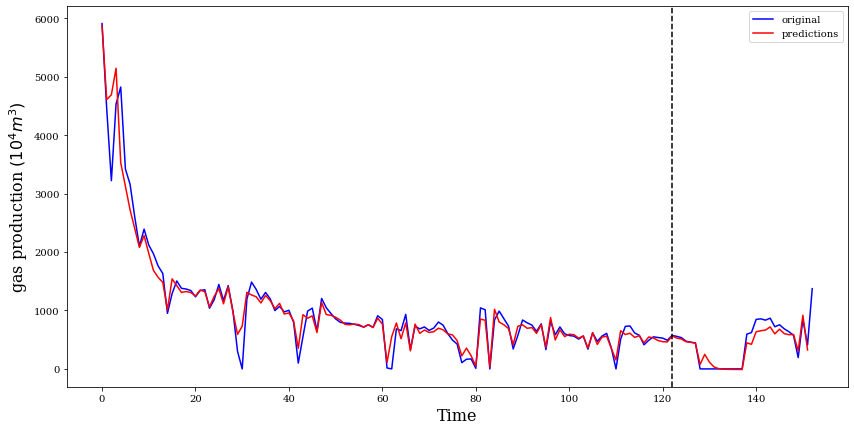

In [141]:
print(lstm_model.summary()) # line plot of observed vs predicted
fig, ax = plt.subplots(1, figsize=(14, 7))
ax.plot(raw_values, label='original', color='blue')
ax.plot(predictions, label='predictions', color='red')
ax.axvline(x=len(train_scaled)+1,color='k', linestyle='--')
ax.legend(loc='upper right')
ax.set_xlabel('Time',fontsize = 16)
ax.set_ylabel('gas production '+ r'$(10^4 m^3)$',fontsize = 16)
#plt.savefig('LSTM.png')
plt.show()

___
# Final Notes
- Since production data generally do not fit the stationary creteria due to the various well operations, more robust ensemble methods can be applied that combine multiple learners to account for the irregularities and thus minimize the error rate.
- The time span plays a crucial role, since production data are generally recorded in months, unlike communal time series, interpolation can definitely be achieved, but special care must be taken when training the models.
- If data on the nature of the reservoir are available, I suggest including them in the models as well and making it a multivariate model, or simply developing simpler supervised machine learning models that do not consider time as a feature and simply rely on the intercorrelation between the training parameters.

---
### Badr Eddine Berrehal (Petroleum Engineer & Data Detective)
- **Email:** [berrehalbadr@gmail.com](berrehalbadr@gmail.com)
- **LinkedIn:** [Badr Berrehal](https://www.linkedin.com/in/badreddine-berrehal-a51010175)
- **Personal Web site:** [UDATA](https://sites.google.com/view/badreddine-berrehal/accueil)
- **GitHub:** [berrehalbadr](https://github.com/berrehalbadr)
- **License Type:** MIT license